# Loans Data Exploration

## Table of Contents
- [ ] Preliminary Wrangling
- [ ] Univariate Exploration
- [ ] Bi-Variate Exploration
- [ ] Multi-variate Exploration

## 1 Preliminary Wrangling
This document explores a dataset containing metadata related to loans such as: 
- The type of loan, duration, amount, etc, to
- Customers employment information that would impact there borrowing power i.e. credit rating, job type, etc. <br>
`Additional variables provided in the data dictionary, Prosper Loan Data`

In [1]:
#pip install <package>

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# for pandasgui dataframe viewer
#from pandasgui import show

%matplotlib inline

In [3]:
#load from Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Google colab read csv
#loans_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prosperLoanData.csv')

# Local drive read csv
loans_raw = pd.read_csv('prosperLoanData.csv')

## Functions

In [5]:
# FUNCTION TO PLOT VALS ALONG X-AXIS, NOMINAL VALS ON Y
def yplot_values(gx, form):
    initialx = 0

    for g in gx.patches:
        gx.text(g.get_width(), initialx + g.get_height()/4,
                form.format(g.get_width()),
                color='black',
                ha="left") 
        initialx+=1

In [6]:
# FUNCTION TO PLOT VALS ALONG Y-AXIS, NOMINAL VALS ON X
def xplot_values(gy, form):
    initialy = 0
    
    # Logic to print the proportion text on the bars
    for g in gy.patches:
        gy.text(initialy + g.get_width()/13, g.get_height(), 
        form.format(g.get_height()), 
        color='black',
        ha='center', # 'center', 'right', 'left'
        va='bottom') # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
        initialy+=1

In [7]:
loans_raw.shape # review shape of dataset

(113937, 81)

In [8]:
loans_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### 1.1 Data Structure
There are 113,937 entries, across 81 variables (as seen above) in this loans dataset.
Below are the variables of interest during this exploration.

In [9]:
# create list
subset = ['EmploymentStatus', 'BorrowerState', 'Occupation', 
'CreditGrade', 'ProsperScore', 'ProsperRating (Alpha)', 
'IncomeRange', 'Term', 'CurrentDelinquencies', 'BorrowerRate', 'DebtToIncomeRatio', 
'ListingCreationDate', 'ClosedDate', 'MonthlyLoanPayment']

# 'ListingCategory (numeric)', - removed to be added later

subset, print('Number of Target Columns: {}\n'.format(len(subset)))

Number of Target Columns: 14



(['EmploymentStatus',
  'BorrowerState',
  'Occupation',
  'CreditGrade',
  'ProsperScore',
  'ProsperRating (Alpha)',
  'IncomeRange',
  'Term',
  'CurrentDelinquencies',
  'BorrowerRate',
  'DebtToIncomeRatio',
  'ListingCreationDate',
  'ClosedDate',
  'MonthlyLoanPayment'],
 None)

#### 1.1.1 Duplicates

In [10]:
## Check for duplicate data
loans_raw.duplicated().value_counts()

False    113937
dtype: int64

### 1.2 Data Cleaning

#### 1.2.1 Data dictionary variables of interest Summary:
Before continuing any further only columns of interest will be retained for the exploration to ensure only the required variables are modified.

In [11]:
# size before modification
loans_raw.shape

(113937, 81)

In [12]:
# reload loans_df with the relevant columns, loans_raw contains the original
loans_df = loans_raw.loc[:, subset].copy()
loans_df.head()

EmploymentStatus BorrowerState  ...           ClosedDate MonthlyLoanPayment
0    Self-employed            CO  ...  2009-08-14 00:00:00             330.43
1         Employed            CO  ...                  NaN             318.93
2    Not available            GA  ...  2009-12-17 00:00:00             123.32
3         Employed            GA  ...                  NaN             321.45
4         Employed            MN  ...                  NaN             563.97

[5 rows x 14 columns]

#### 1.2.2 Datatypes

#### Date time correction

In [13]:
# convert to correct data types
toDates = ['ListingCreationDate', 'ClosedDate'] # date mask
loans_df[toDates] = loans_df[toDates].astype('datetime64')

In [14]:
# check datatypes are now correct
loans_df[toDates].dtypes

ListingCreationDate    datetime64[ns]
ClosedDate             datetime64[ns]
dtype: object

#### Date Year and Month extraction

In [15]:
# Extract year and month as ProsperRating and CreditGrade vary with year and month
loans_df['ListingCreationYear'] = pd.DatetimeIndex(loans_df.ListingCreationDate).year
loans_df['ListingCreationMonth'] = pd.DatetimeIndex(loans_df.ListingCreationDate).month

In [16]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   EmploymentStatus       111682 non-null  object        
 1   BorrowerState          108422 non-null  object        
 2   Occupation             110349 non-null  object        
 3   CreditGrade            28953 non-null   object        
 4   ProsperScore           84853 non-null   float64       
 5   ProsperRating (Alpha)  84853 non-null   object        
 6   IncomeRange            113937 non-null  object        
 7   Term                   113937 non-null  int64         
 8   CurrentDelinquencies   113240 non-null  float64       
 9   BorrowerRate           113937 non-null  float64       
 10  DebtToIncomeRatio      105383 non-null  float64       
 11  ListingCreationDate    113937 non-null  datetime64[ns]
 12  ClosedDate             55089 non-null   date

##### Category re-definition

In [17]:
# Find ordinal variables and set order from lowest (left) to highest (right)
ordinal_dict = {'CreditGrade': ['HR','E','D','C','B','A','AA'],
                'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
                }

# Udacity code snippet to replace Column in existing DF with newly configured order (from above)
for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_dict[var])
    
    loans_df[var] = loans_df[var].astype(ordered_var)

##### Column type definitions

In [18]:
# separation of variables
numbers = ['ProsperScore', 'Term', 'CurrentDelinquencies', 'BorrowerRate', 'DebtToIncomeRatio', 'MonthlyLoanPayment']
categories = ['EmploymentStatus','BorrowerState', 'Occupation', 'CreditGrade', 'IncomeRange']

### 1.3 Univariate Exploration

#### 1.3.1 NaN/Missing Data
First visual is to grasp the amount of NaN present in the current dataset to determine whether additional cleaning is required. 

In [19]:
# create empty list to hold series data, information is held in .index (column names) and .values (number of NaN per column)
Nan_sublist_all = []
Nan_sublist_all = loans_df.isna().sum()
Nan_sublist_all.sort_values(ascending=False)

CreditGrade              85125
ClosedDate               58848
ProsperRating (Alpha)    29084
ProsperScore             29084
DebtToIncomeRatio         8554
IncomeRange               7741
BorrowerState             5515
Occupation                3588
EmploymentStatus          2255
CurrentDelinquencies       697
ListingCreationMonth         0
ListingCreationYear          0
MonthlyLoanPayment           0
ListingCreationDate          0
BorrowerRate                 0
Term                         0
dtype: int64

In [20]:
# List above contains unnecessary entries limiting viewing.
# Add equality test to narrow down to column names with 
Nan_sublist = Nan_sublist_all[Nan_sublist_all.values > 0]

In [21]:
Nan_sublist.shape

(10,)

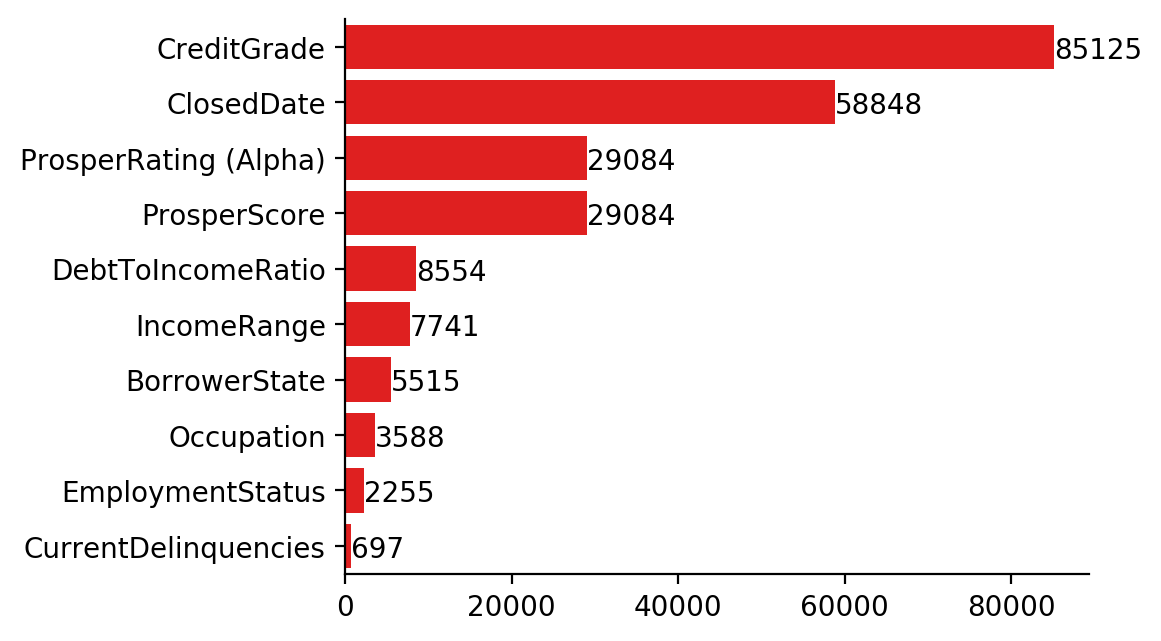

In [22]:
# explicit figure and figsize declaraction
fig, axes = plt.subplots(1,1)
sb.despine(fig)

# sort by 
g0 = sb.barplot(x=Nan_sublist.values, y=Nan_sublist.index, ax=axes, color='red', order=Nan_sublist.sort_values(ascending=False).index )

yplot_values(g0, '{:1.0f}');

plt.show()

In [23]:
loans_df.shape # review size prior to dropping Nan

(113937, 16)

In [24]:
Nan_sublist.sort_values(ascending=False)[4:].index

Index(['DebtToIncomeRatio', 'IncomeRange', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'CurrentDelinquencies'],
      dtype='object')

In [25]:
# slice object, convert to list and check datatype
subset_drop = Nan_sublist.sort_values(ascending=False)[4:].index.tolist()
subset_drop, type(subset_drop)

(['DebtToIncomeRatio',
  'IncomeRange',
  'BorrowerState',
  'Occupation',
  'EmploymentStatus',
  'CurrentDelinquencies'],
 list)

In [26]:
loans_df.dropna(axis=0, subset=subset_drop, inplace=True)

In [27]:
loans_df.shape

(94754, 16)

## 2 Exploratory data analysis
The EDA will revolve around the exploration of the 14 variables mentioned previously.

In [28]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94754 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EmploymentStatus       94754 non-null  object        
 1   BorrowerState          94754 non-null  object        
 2   Occupation             94754 non-null  object        
 3   CreditGrade            18410 non-null  category      
 4   ProsperScore           76224 non-null  float64       
 5   ProsperRating (Alpha)  76224 non-null  object        
 6   IncomeRange            94754 non-null  category      
 7   Term                   94754 non-null  int64         
 8   CurrentDelinquencies   94754 non-null  float64       
 9   BorrowerRate           94754 non-null  float64       
 10  DebtToIncomeRatio      94754 non-null  float64       
 11  ListingCreationDate    94754 non-null  datetime64[ns]
 12  ClosedDate             41550 non-null  datetime64[ns]
 13  

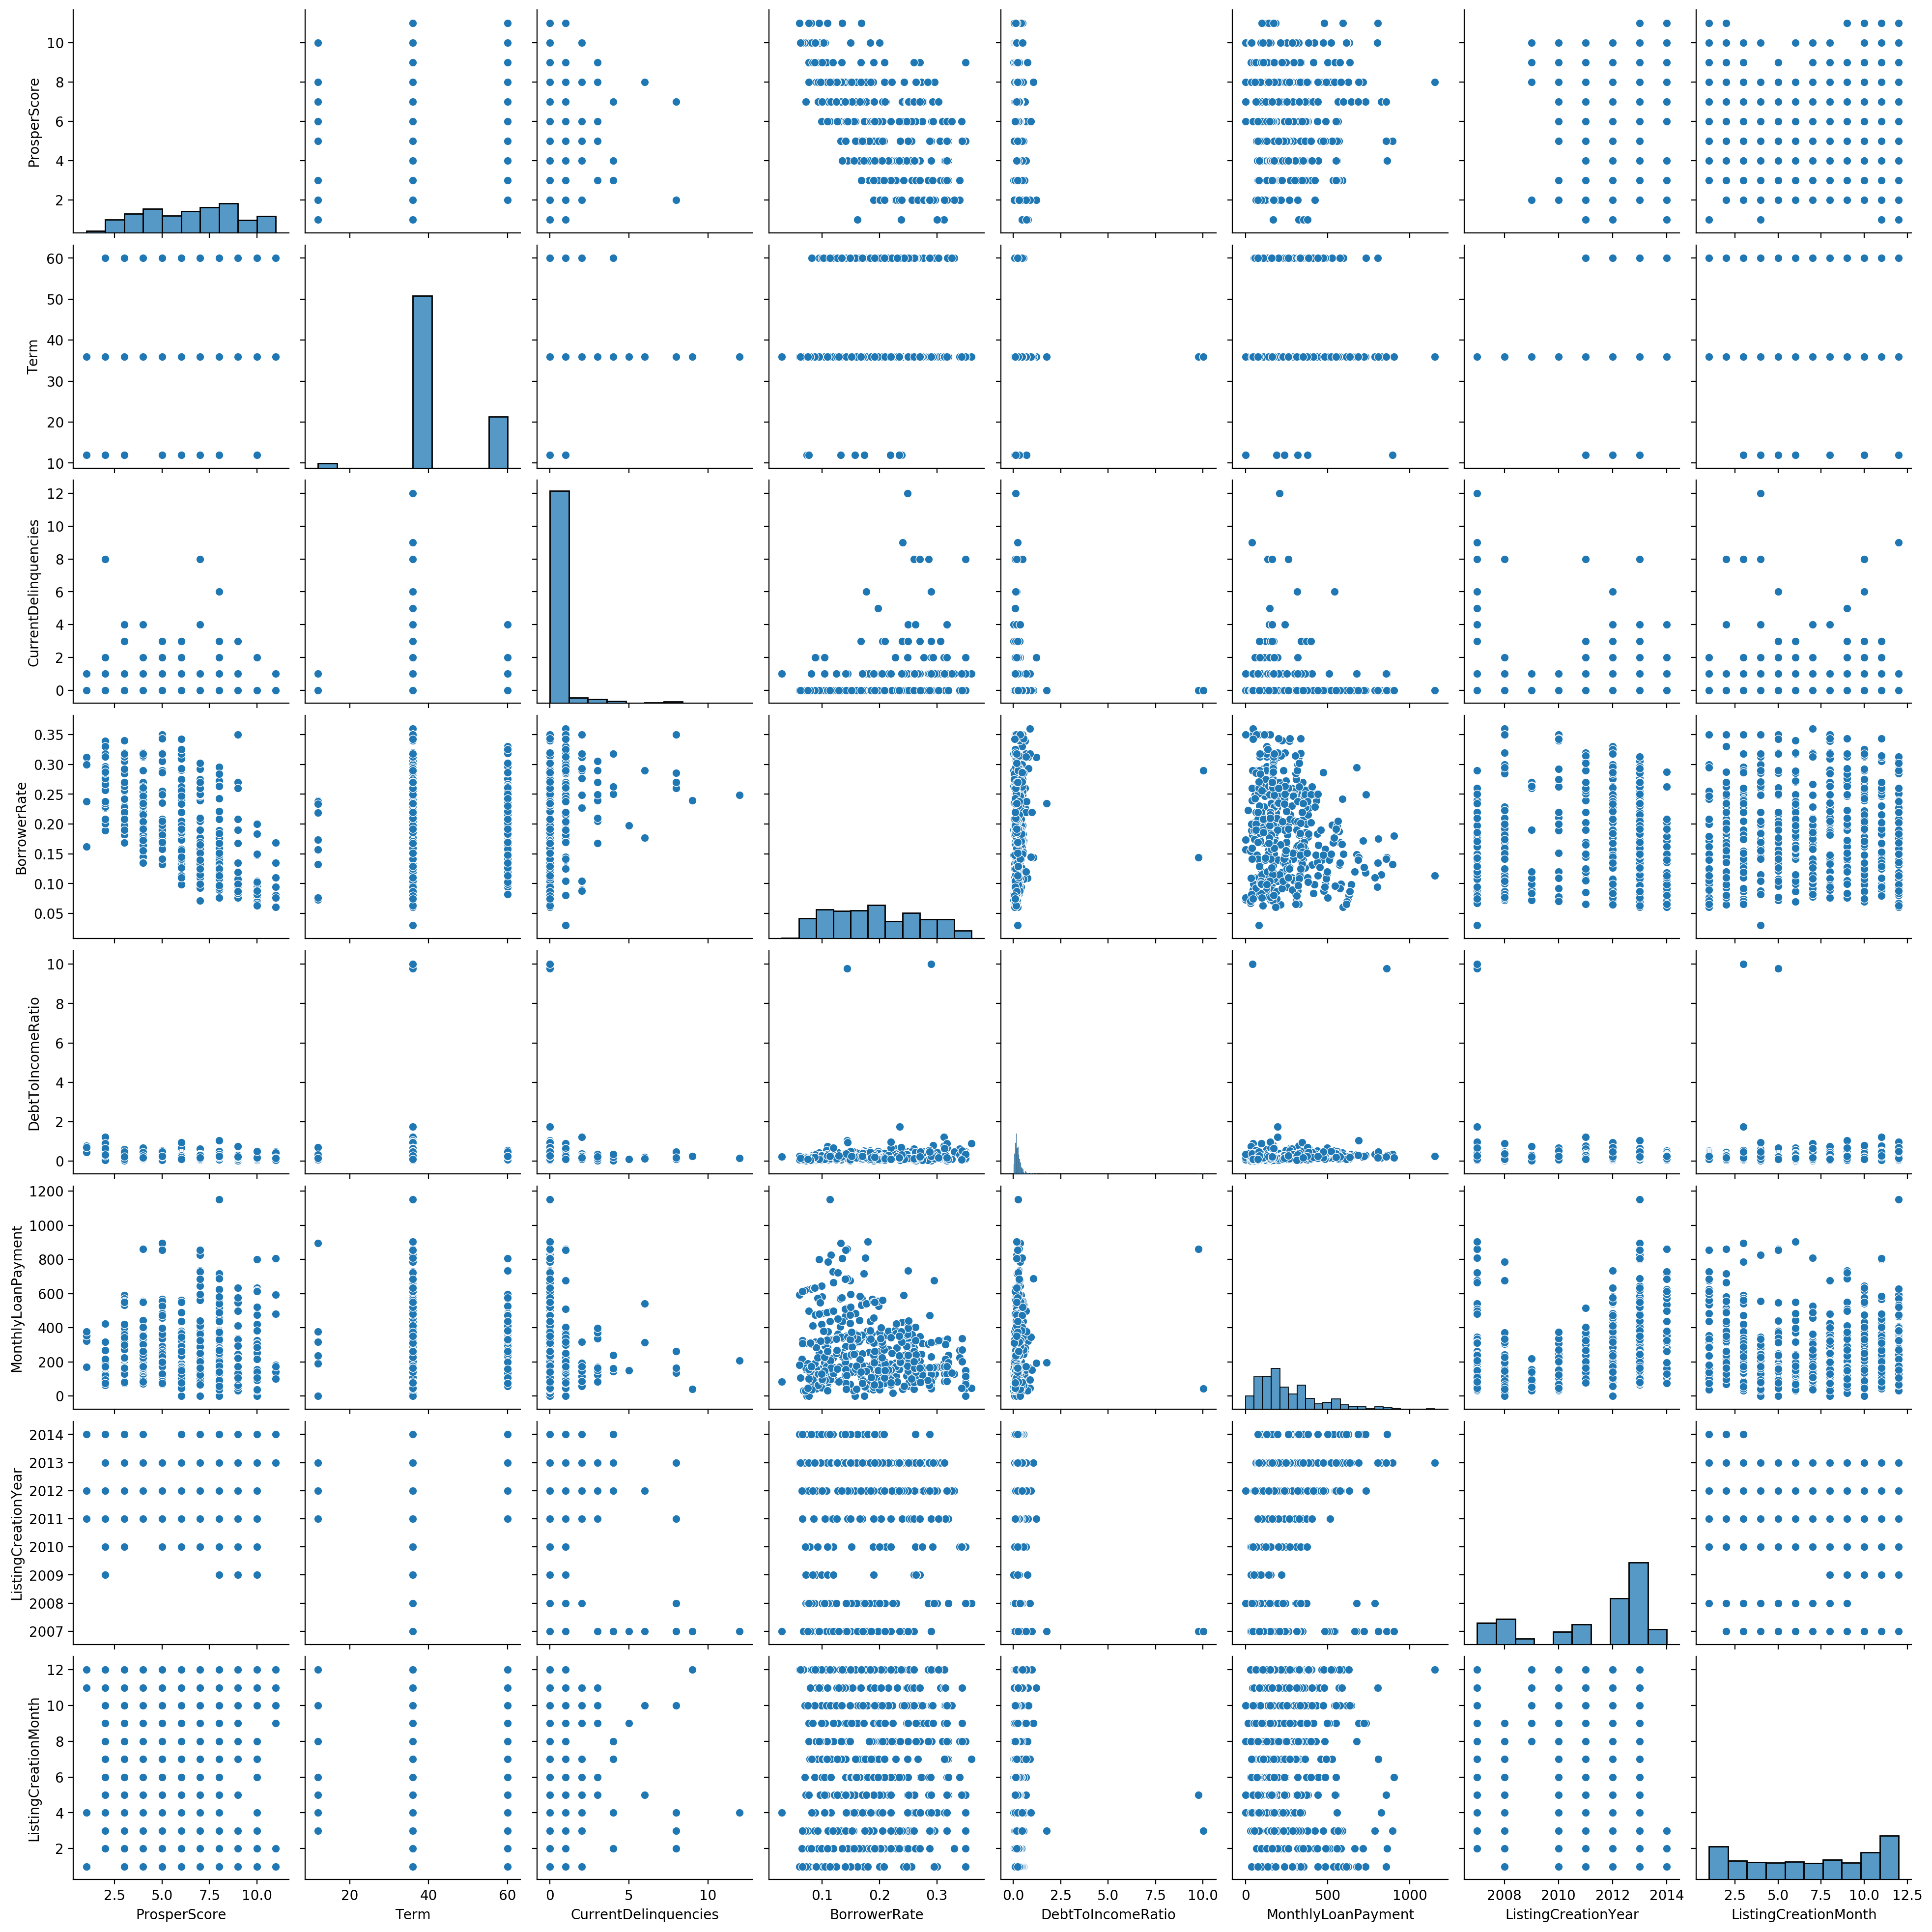

In [29]:
loans_samples = loans_df.sample(n=500)

sb.pairplot(loans_samples,
            kind='scatter',
            dropna=True,
            height=2.5
            );

Of the 500 random samples:<br>
- **Prosper score** shows a normal distribution, with a weak negative correlation to **BorrowRate** and a weak positive correlation with **MonthlyLoanPayment**.
- Term only is left skewed, with 3 main values.
- **CurrentDelinquencies** is right skewed, with possibly a weak positive correlation to **BorrowRate** and a weak negative correlation to **MonthlyLoanRepayment**.
- **BorrowRate** appears bimodal.
- **DebtIncome** appears heavily right skewed with a large peak of values around 0.
- **MonthlyLoanPayment** is right skewed.

Of the quantitative variables, we will investigate **Prosper Score, Borrowrate, MonthlyLoanPayment, CurrentDelinquincies** to clarify the correlations seen above.

### 2.1 What affects a loan repayments interest rate/BorrowRate?
What factors greatly affect the BorrowRate and as a result the **MonthlyLoanPayment** of the customer?

#### 2.1.1 Borrower Rate

In [30]:
loans_df.BorrowerRate.describe()

count    94754.000000
mean         0.191104
std          0.074819
min          0.000000
25%          0.131400
50%          0.180000
75%          0.249800
max          0.360000
Name: BorrowerRate, dtype: float64

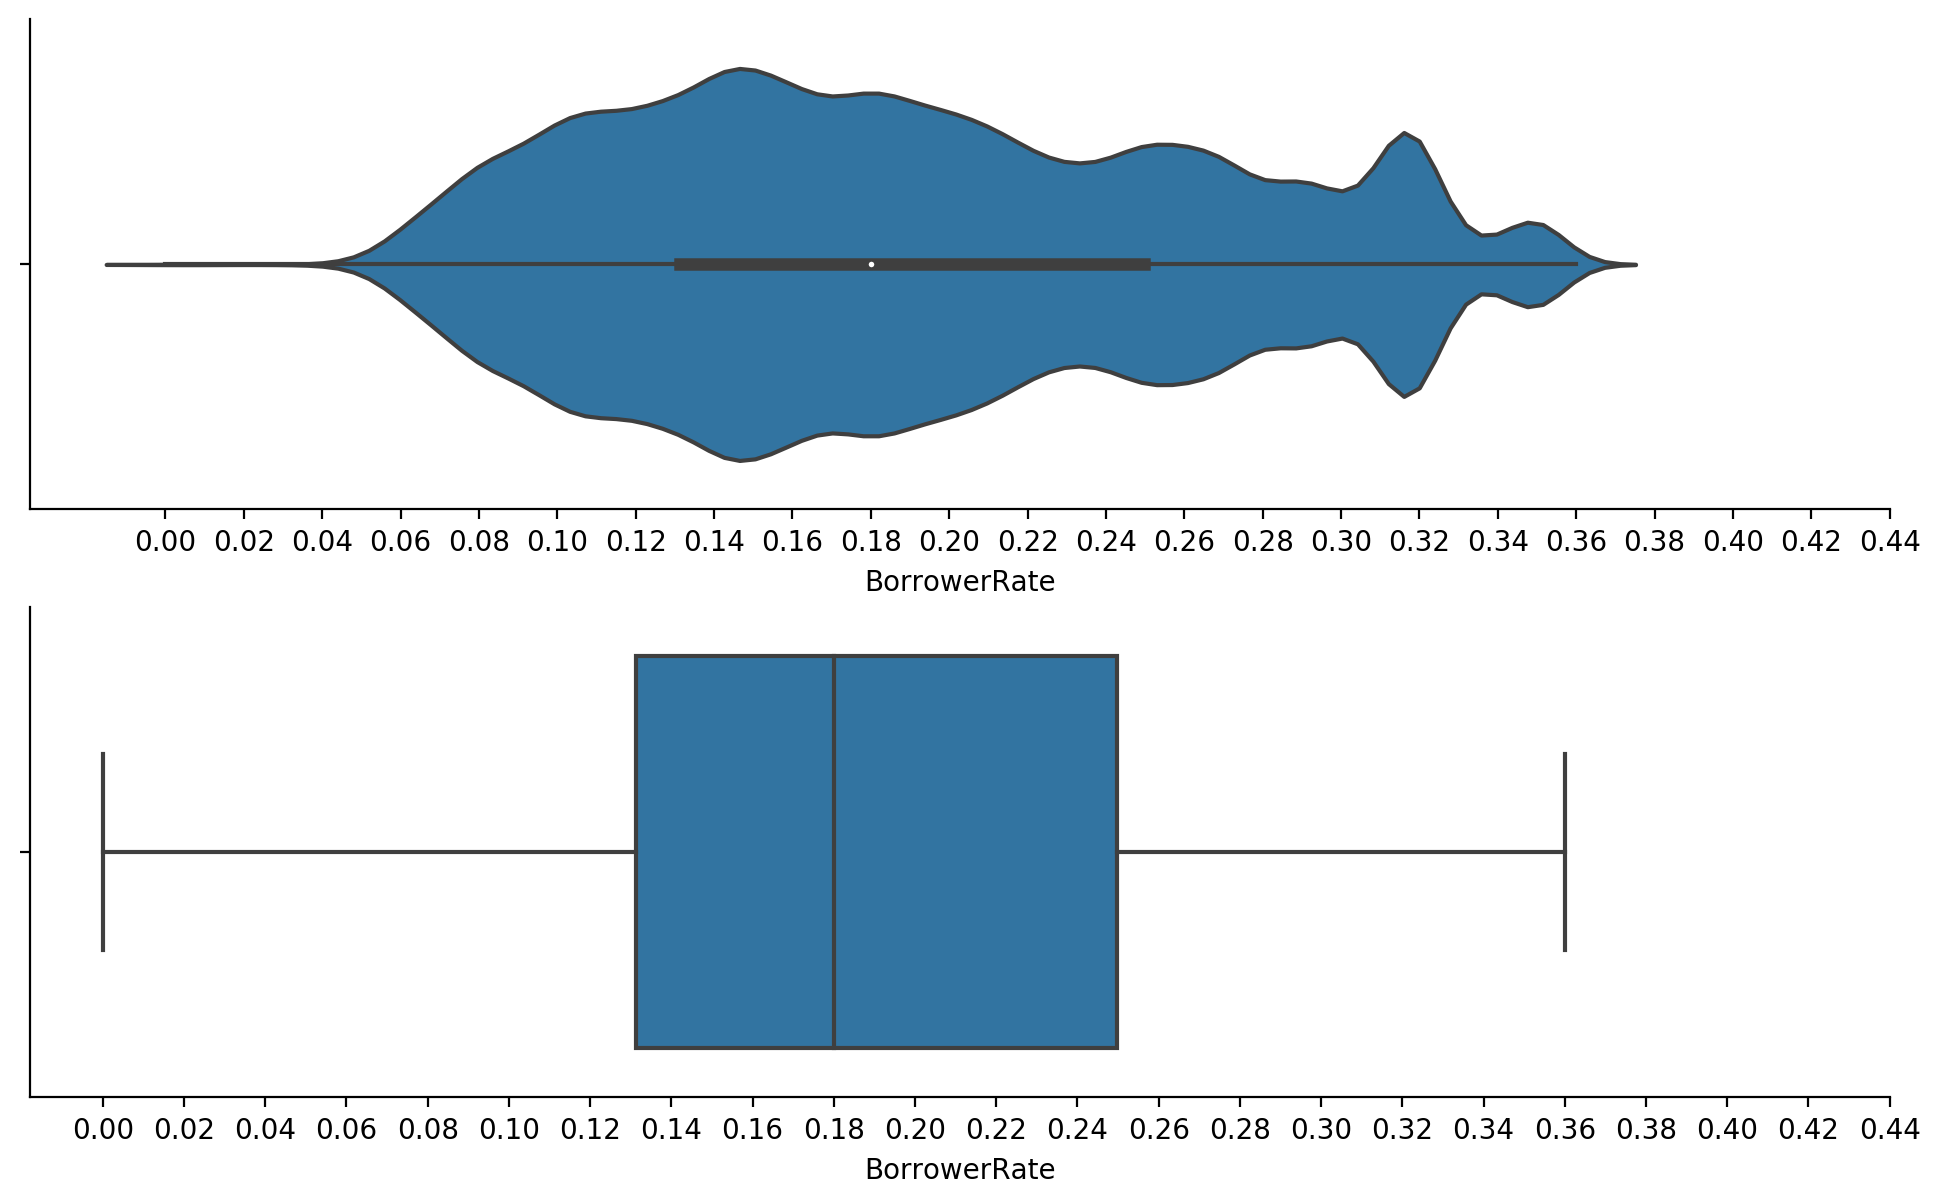

In [31]:
fig, axes = plt.subplots(2,1, figsize=(12, 7))
sb.despine(fig)

yticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.1, 0.02)

g0 = sb.violinplot(x=loans_df.BorrowerRate, 
                   ax=axes[0])
g0.set_xticks( yticks_range )

g1 = sb.boxplot(x=loans_df.BorrowerRate, 
                ax=axes[1])
g1.set_xticks( yticks_range )

plt.show();

In [32]:
loans_df.BorrowerRate.median()

0.18

Both graphs approximate the median **BorrowRate** to be 18%, both plots suggest outliers to be considered ~38% and above. This allows unless to optimize the bins to be between 0 and 0.4.

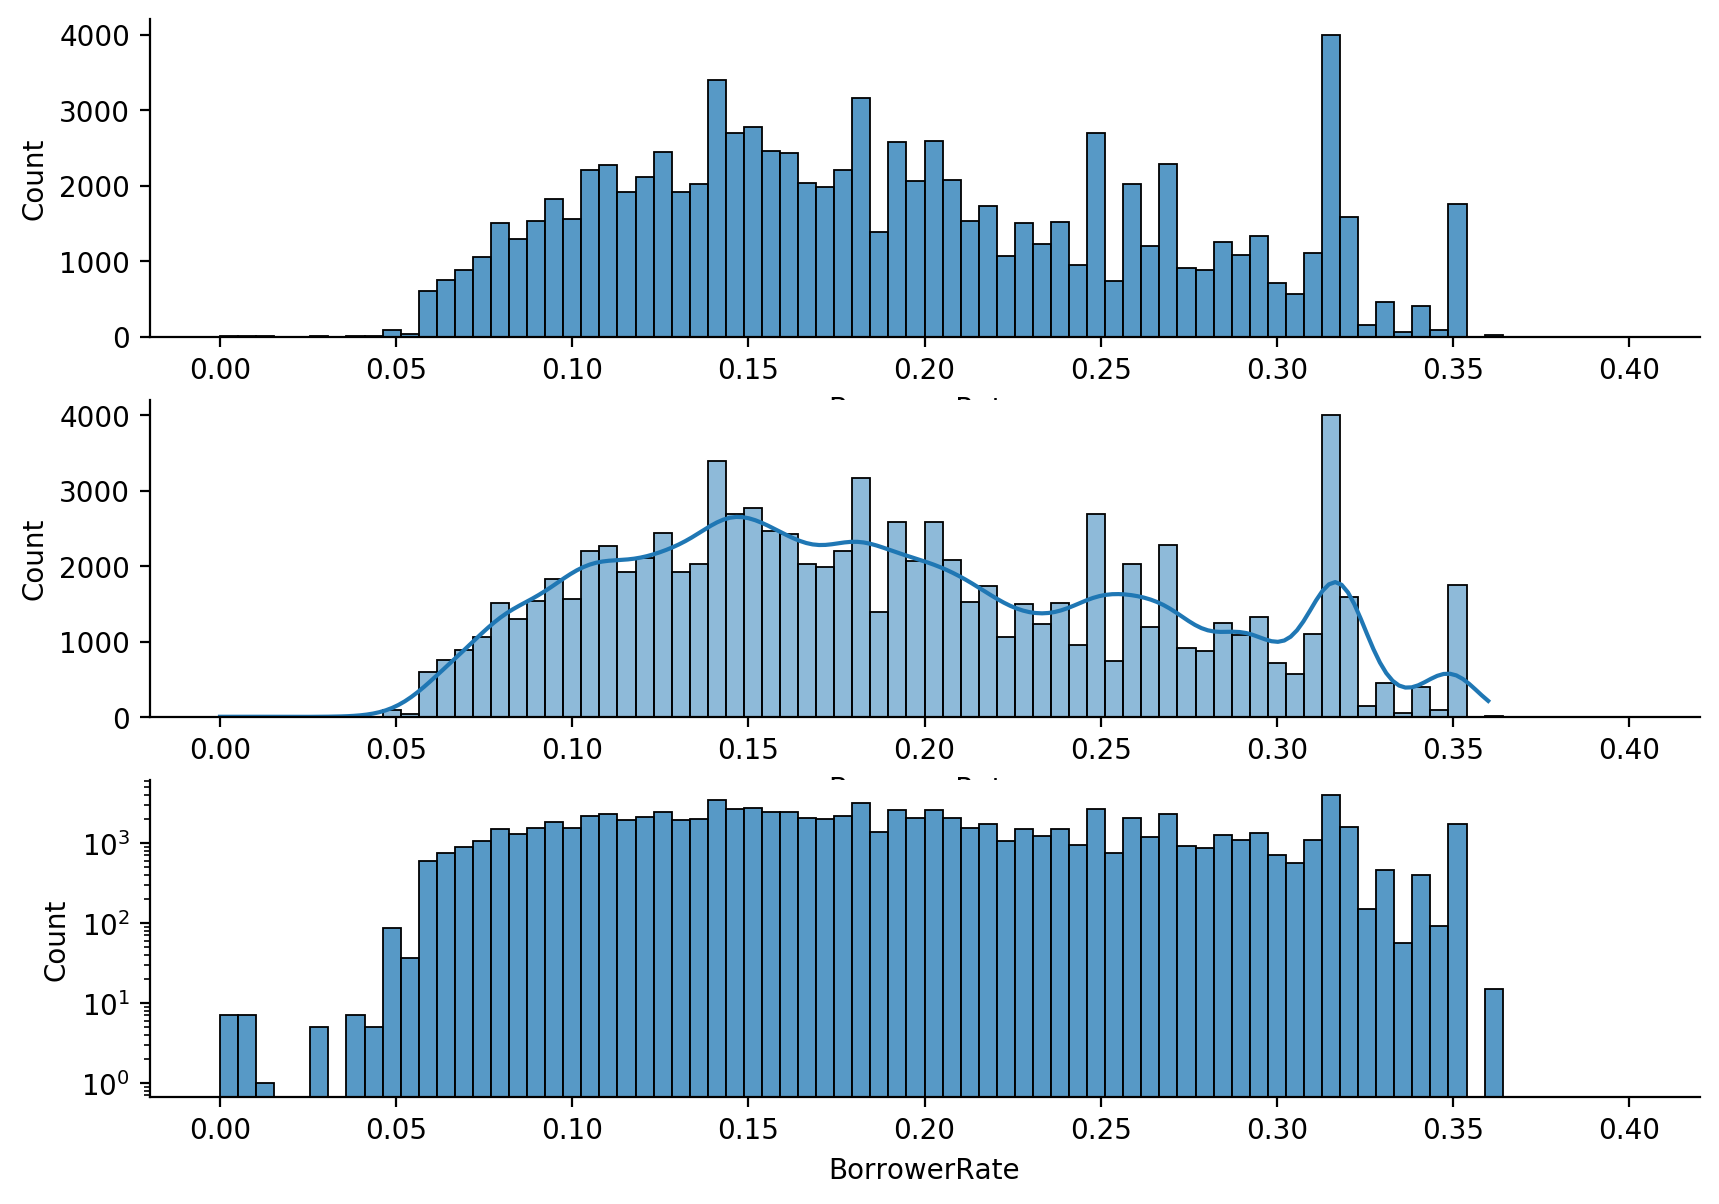

In [33]:
fig, axes = plt.subplots(3,1, figsize=(10,7))
sb.despine(fig)

# graph 1 - distribution of borrow rates
g0 = sb.histplot(loans_df,
        x='BorrowerRate',
        binrange=(0, 0.4),
        element='bars',
        multiple="stack",
        ax=axes[0]);

g1 = sb.histplot(loans_df,
        x='BorrowerRate',
        binrange=(0, 0.4),
        element='bars',
        kde=True,
        multiple="stack",
        ax=axes[1]);

axes[2].set(yscale="log")
g2 = sb.histplot(loans_df,
        x='BorrowerRate',
        binrange=(0, 0.4),
        element='bars',
        #log_scale=True,
        multiple="stack",
        ax=axes[2]);

plt.show();

BorrowRate variable shows a bi-modal normal distribution, one towards the lower end where the bulk of the customers are within 10% to 20%. The second towards the higher end with a peak at 31%.

The KDE supports that the majority under the curve are where the first normal distribution and then slowly decreases before forming another peak.

The log scale transformation reveals the outliers not seen in the prior 2 graphs above it.

#### 2.1.2 Employment Status

In [34]:
loans_df.EmploymentStatus.value_counts()

Employed         65896
Full-time        24044
Other             2194
Self-employed      973
Part-time          880
Retired            701
Not employed        66
Name: EmploymentStatus, dtype: int64

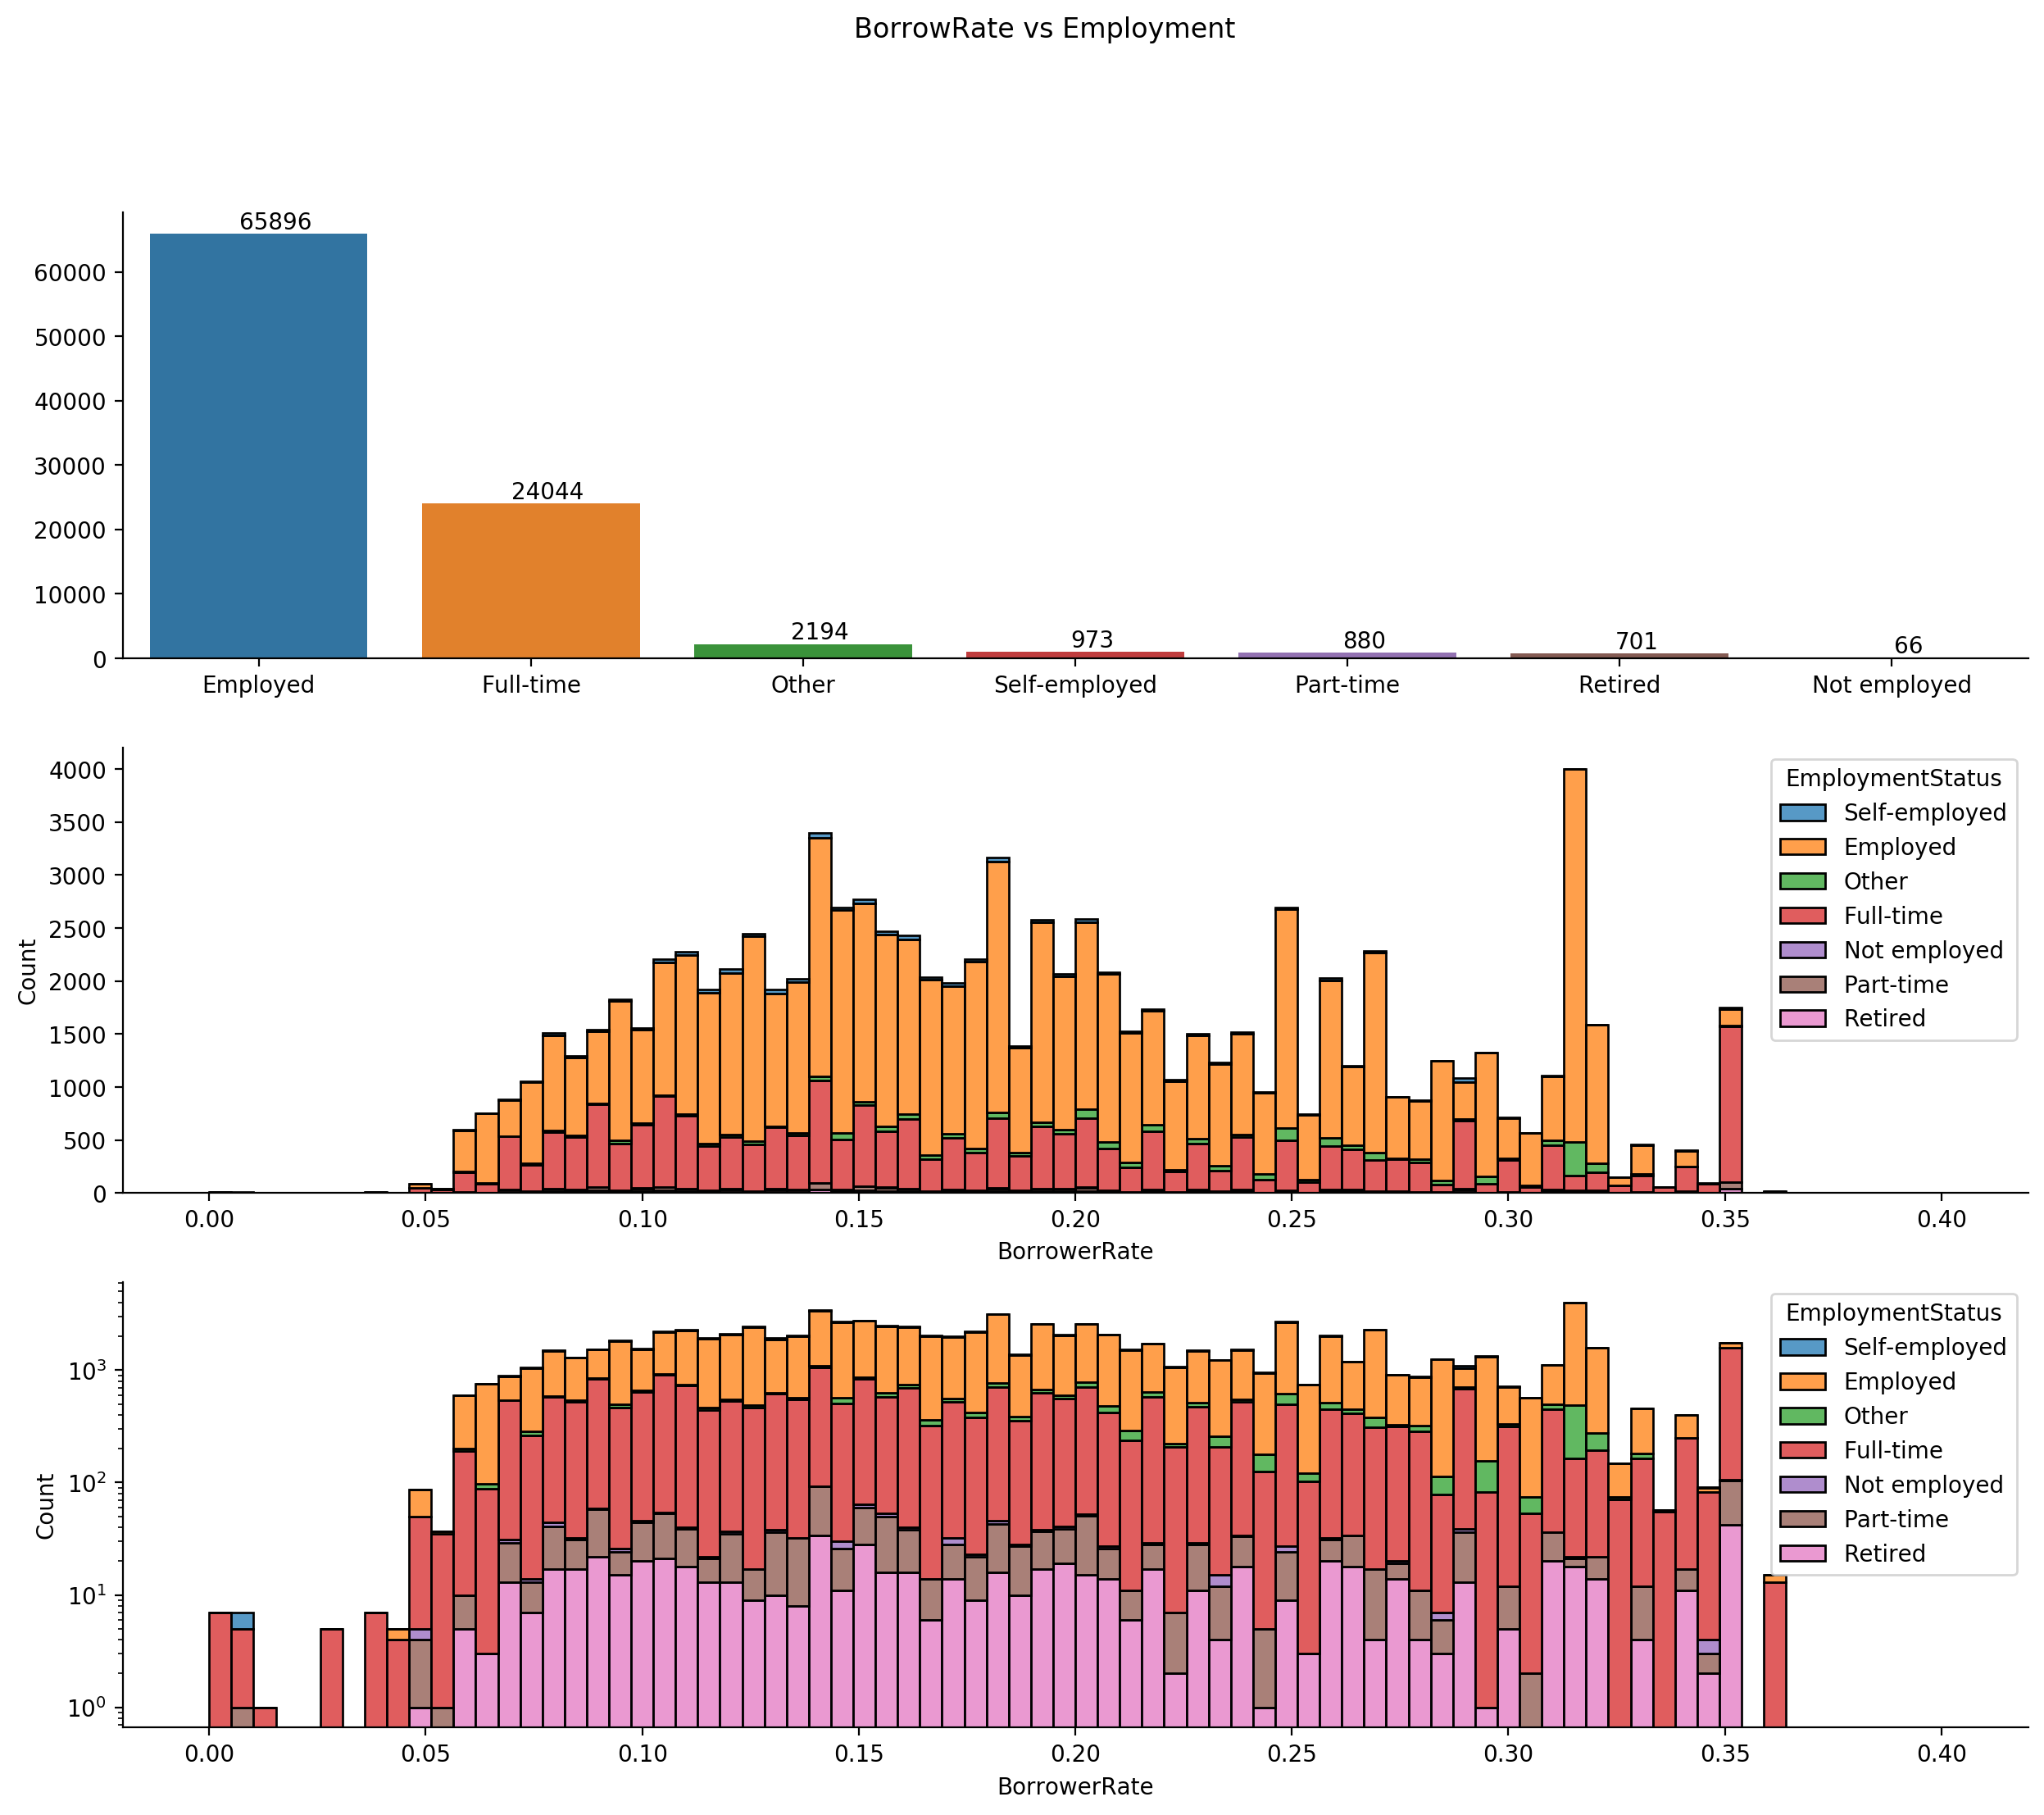

In [35]:
# subplots(row, col)
fig, axes = plt.subplots(3,1, figsize=(15,12))
sb.despine(fig)

# graph 1 - employment status
g0 = sb.barplot(x=loans_df.EmploymentStatus.value_counts().index,
        y=loans_df.EmploymentStatus.value_counts().values,
        ax=axes[0]);
xplot_values(g0, '{:1.0f}')

# graph 2 - distribution of borrow rates
g1 = sb.histplot(loans_df, 
        x='BorrowerRate',
        binrange=(0, 0.4),
        element='bars',
        hue='EmploymentStatus',
        multiple='stack',
        ax=axes[1]);


# graph 3 - log scale transformation of of graph 1 to assist in visualizing smaller values
axes[2].set(yscale="log")
g2 = sb.histplot(loans_df, 
        x='BorrowerRate',
        binrange=(0, 0.4), 
        element='bars',
        hue='EmploymentStatus',
        multiple='stack',
        ax=axes[2]);

fig.suptitle('BorrowRate vs Employment')     

plt.show();

The univariate exploration of the Employment status reveals majority of the loan applicants are 'Employed', which is redundant as it splits further into Full-time Employed, Self-Employed, Part-time, other etc meaning the data classifications were not considered appropriately.
The Bi-variate exploration against BorrowRate, reveals the spread of employment with generally revolving around 10 to 30% +/- 5%, with a large peak at ~32%.
The log transformation provides clarity for the lower values not otherwise seen in graph 2, the BorrowRates of Full-time employees receiving 0.5-1% is interesting. If they were incorrectly entered or due to the low overall amount required to be borrowed that led to such a low rate.

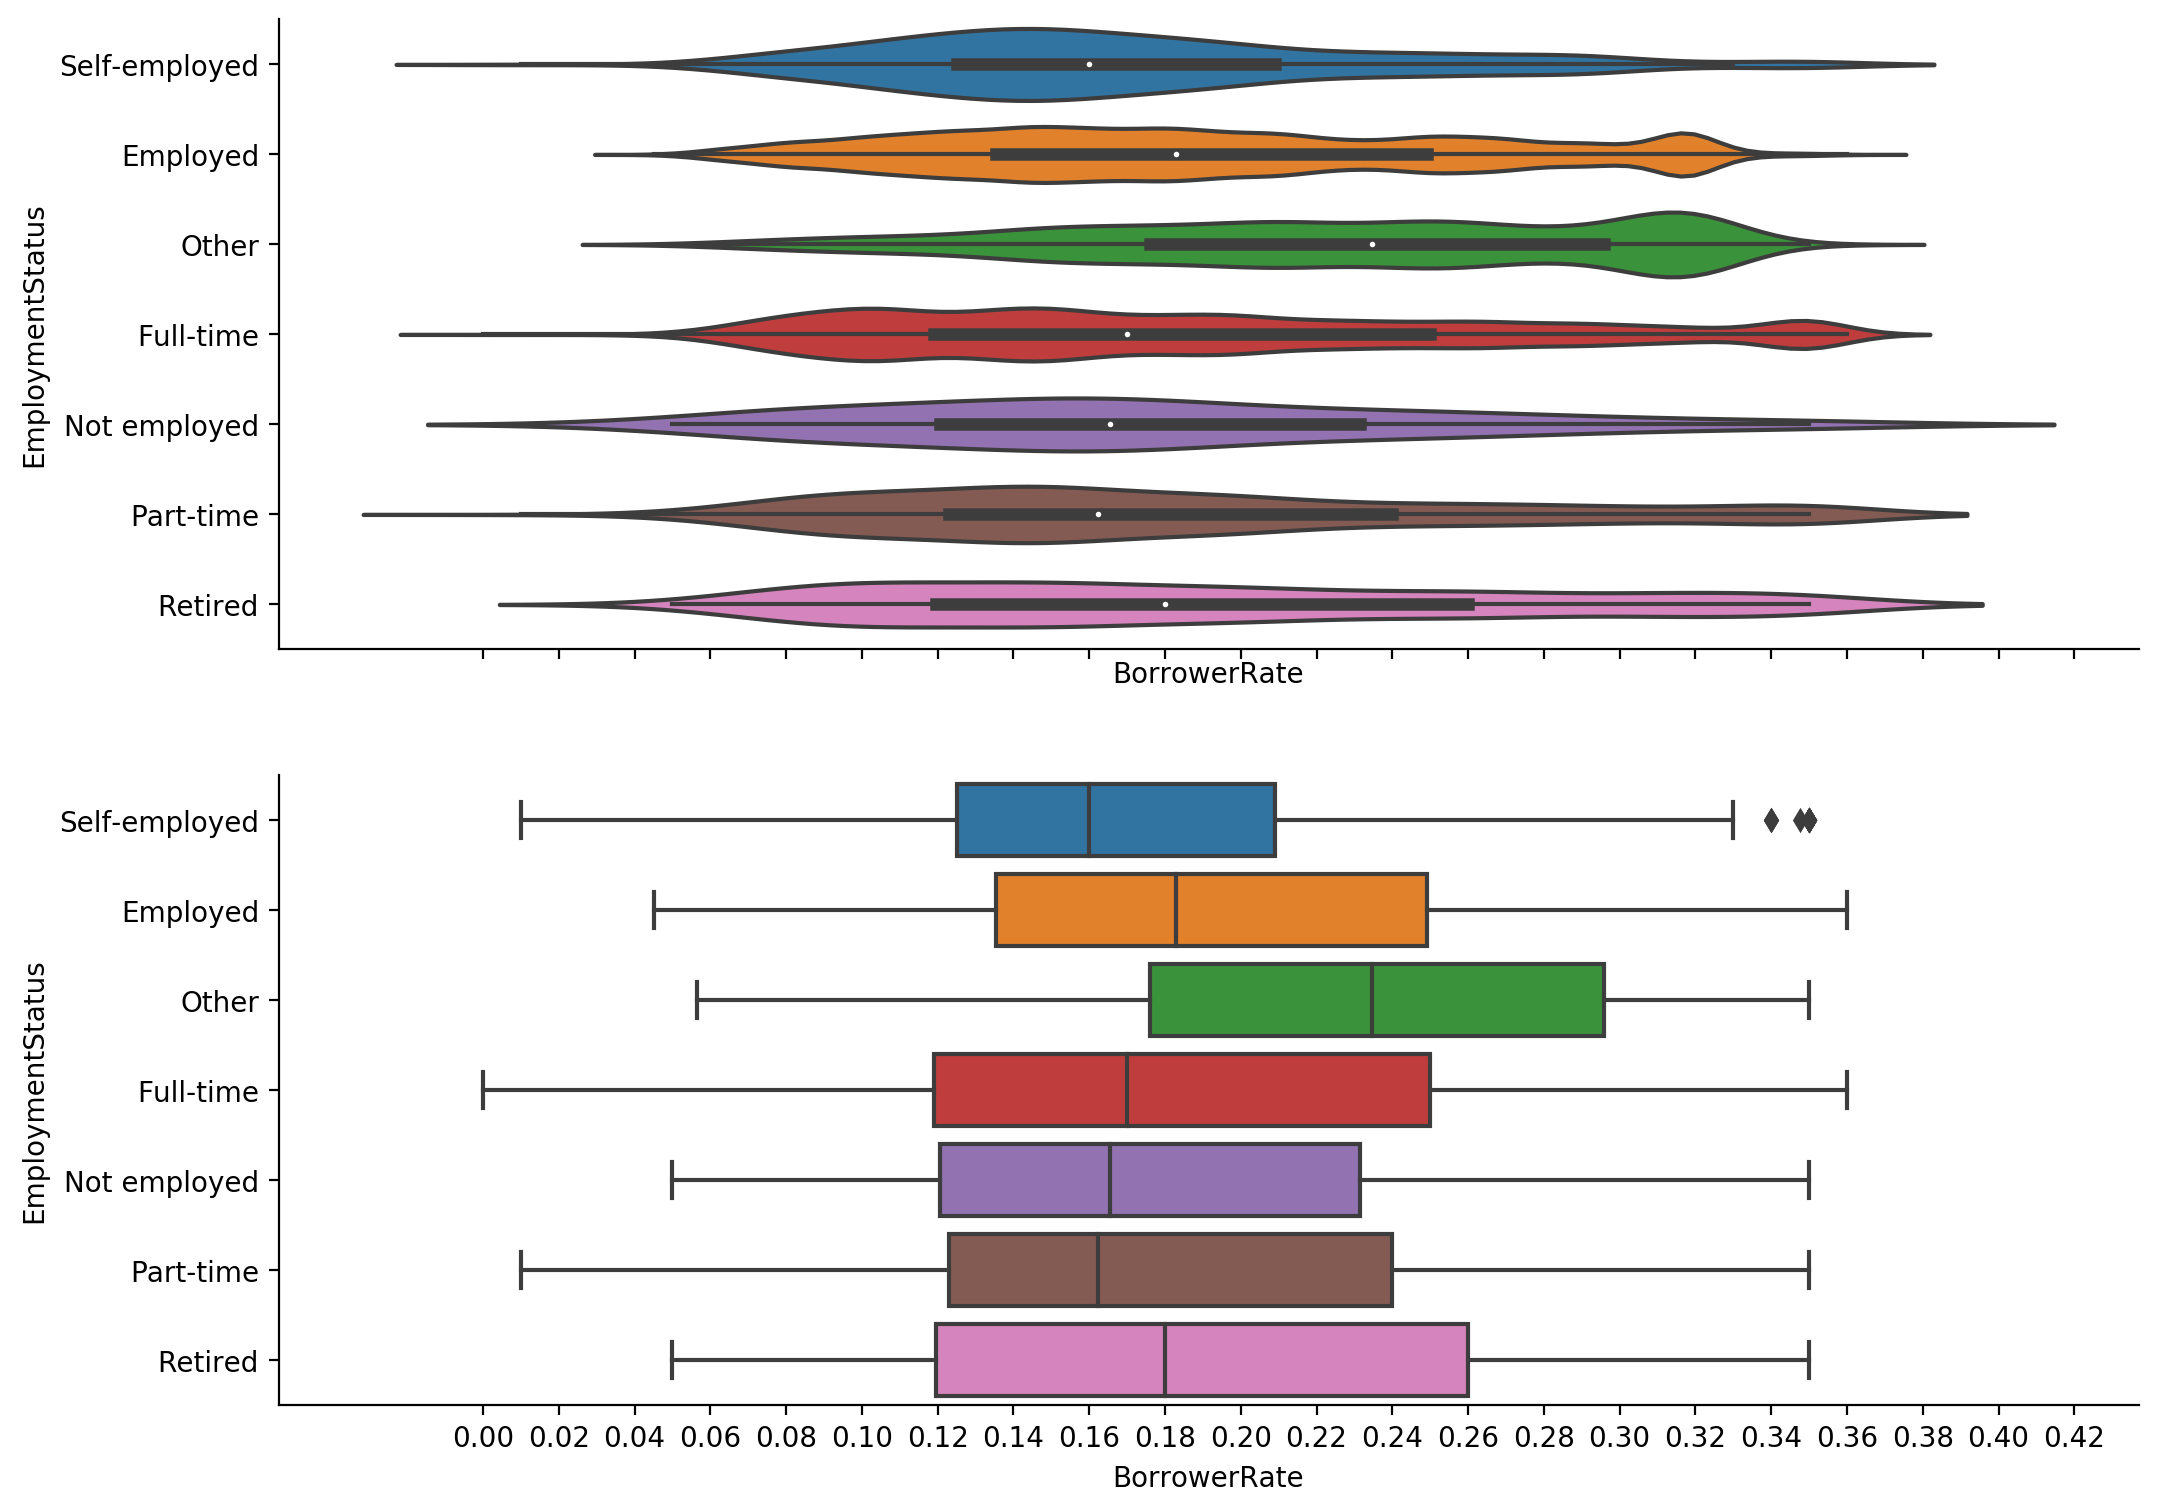

In [36]:
# subplots(row, col)
fig, axes = plt.subplots(2,1, figsize=(12, 9), sharex=True)
sb.despine(fig)

xticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.08, 0.02)

g0 = sb.violinplot(
    y=loans_df.EmploymentStatus,
    x=loans_df.BorrowerRate,
    ax=axes[0]);

g1 = sb.boxplot(
    y=loans_df.EmploymentStatus,
    x=loans_df.BorrowerRate,
    ax=axes[1]);
g1.set_xticks(xticks_range);

Of the 7 employment types, the median borrow rate of **Not employed** is significantly higher then the remaining, as well a large majority of it's spread situated at the higher borrow rates due to the increased risk of the individual paying it back.

It is interesting to see at around 30% Borrower Rate, **Other** has the widest spread at ~35%, **Full-time** being the wide and tall simultaneously at ~36.

It is evident that borrower rate is affected by employment status given the **Not Employed** having a slightly lower median and smaller IQR than that of a **Full-time** employee.

In [37]:
# check shape before removal
loans_df.shape

(94754, 16)

In [38]:
# filter employmentstatus and income range
loans_df = loans_df[(loans_df.EmploymentStatus!='Not available')& (loans_df.IncomeRange!='Not displayed')]

In [39]:
# new DF size
loans_df.shape

(94754, 16)

Having **Not Available** and **Income Displayed** is redundant information that doesn't assist in the analysis of what affects BorrowRate.

#### 2.1.3 Occupation

In [40]:
loans_df.Occupation.value_counts()

Other                          23295
Professional                   12109
Computer Programmer             3907
Executive                       3810
Teacher                         3433
                               ...  
Student - College Sophomore       38
Student - College Freshman        28
Judge                             22
Student - Community College       13
Student - Technical School         7
Name: Occupation, Length: 67, dtype: int64

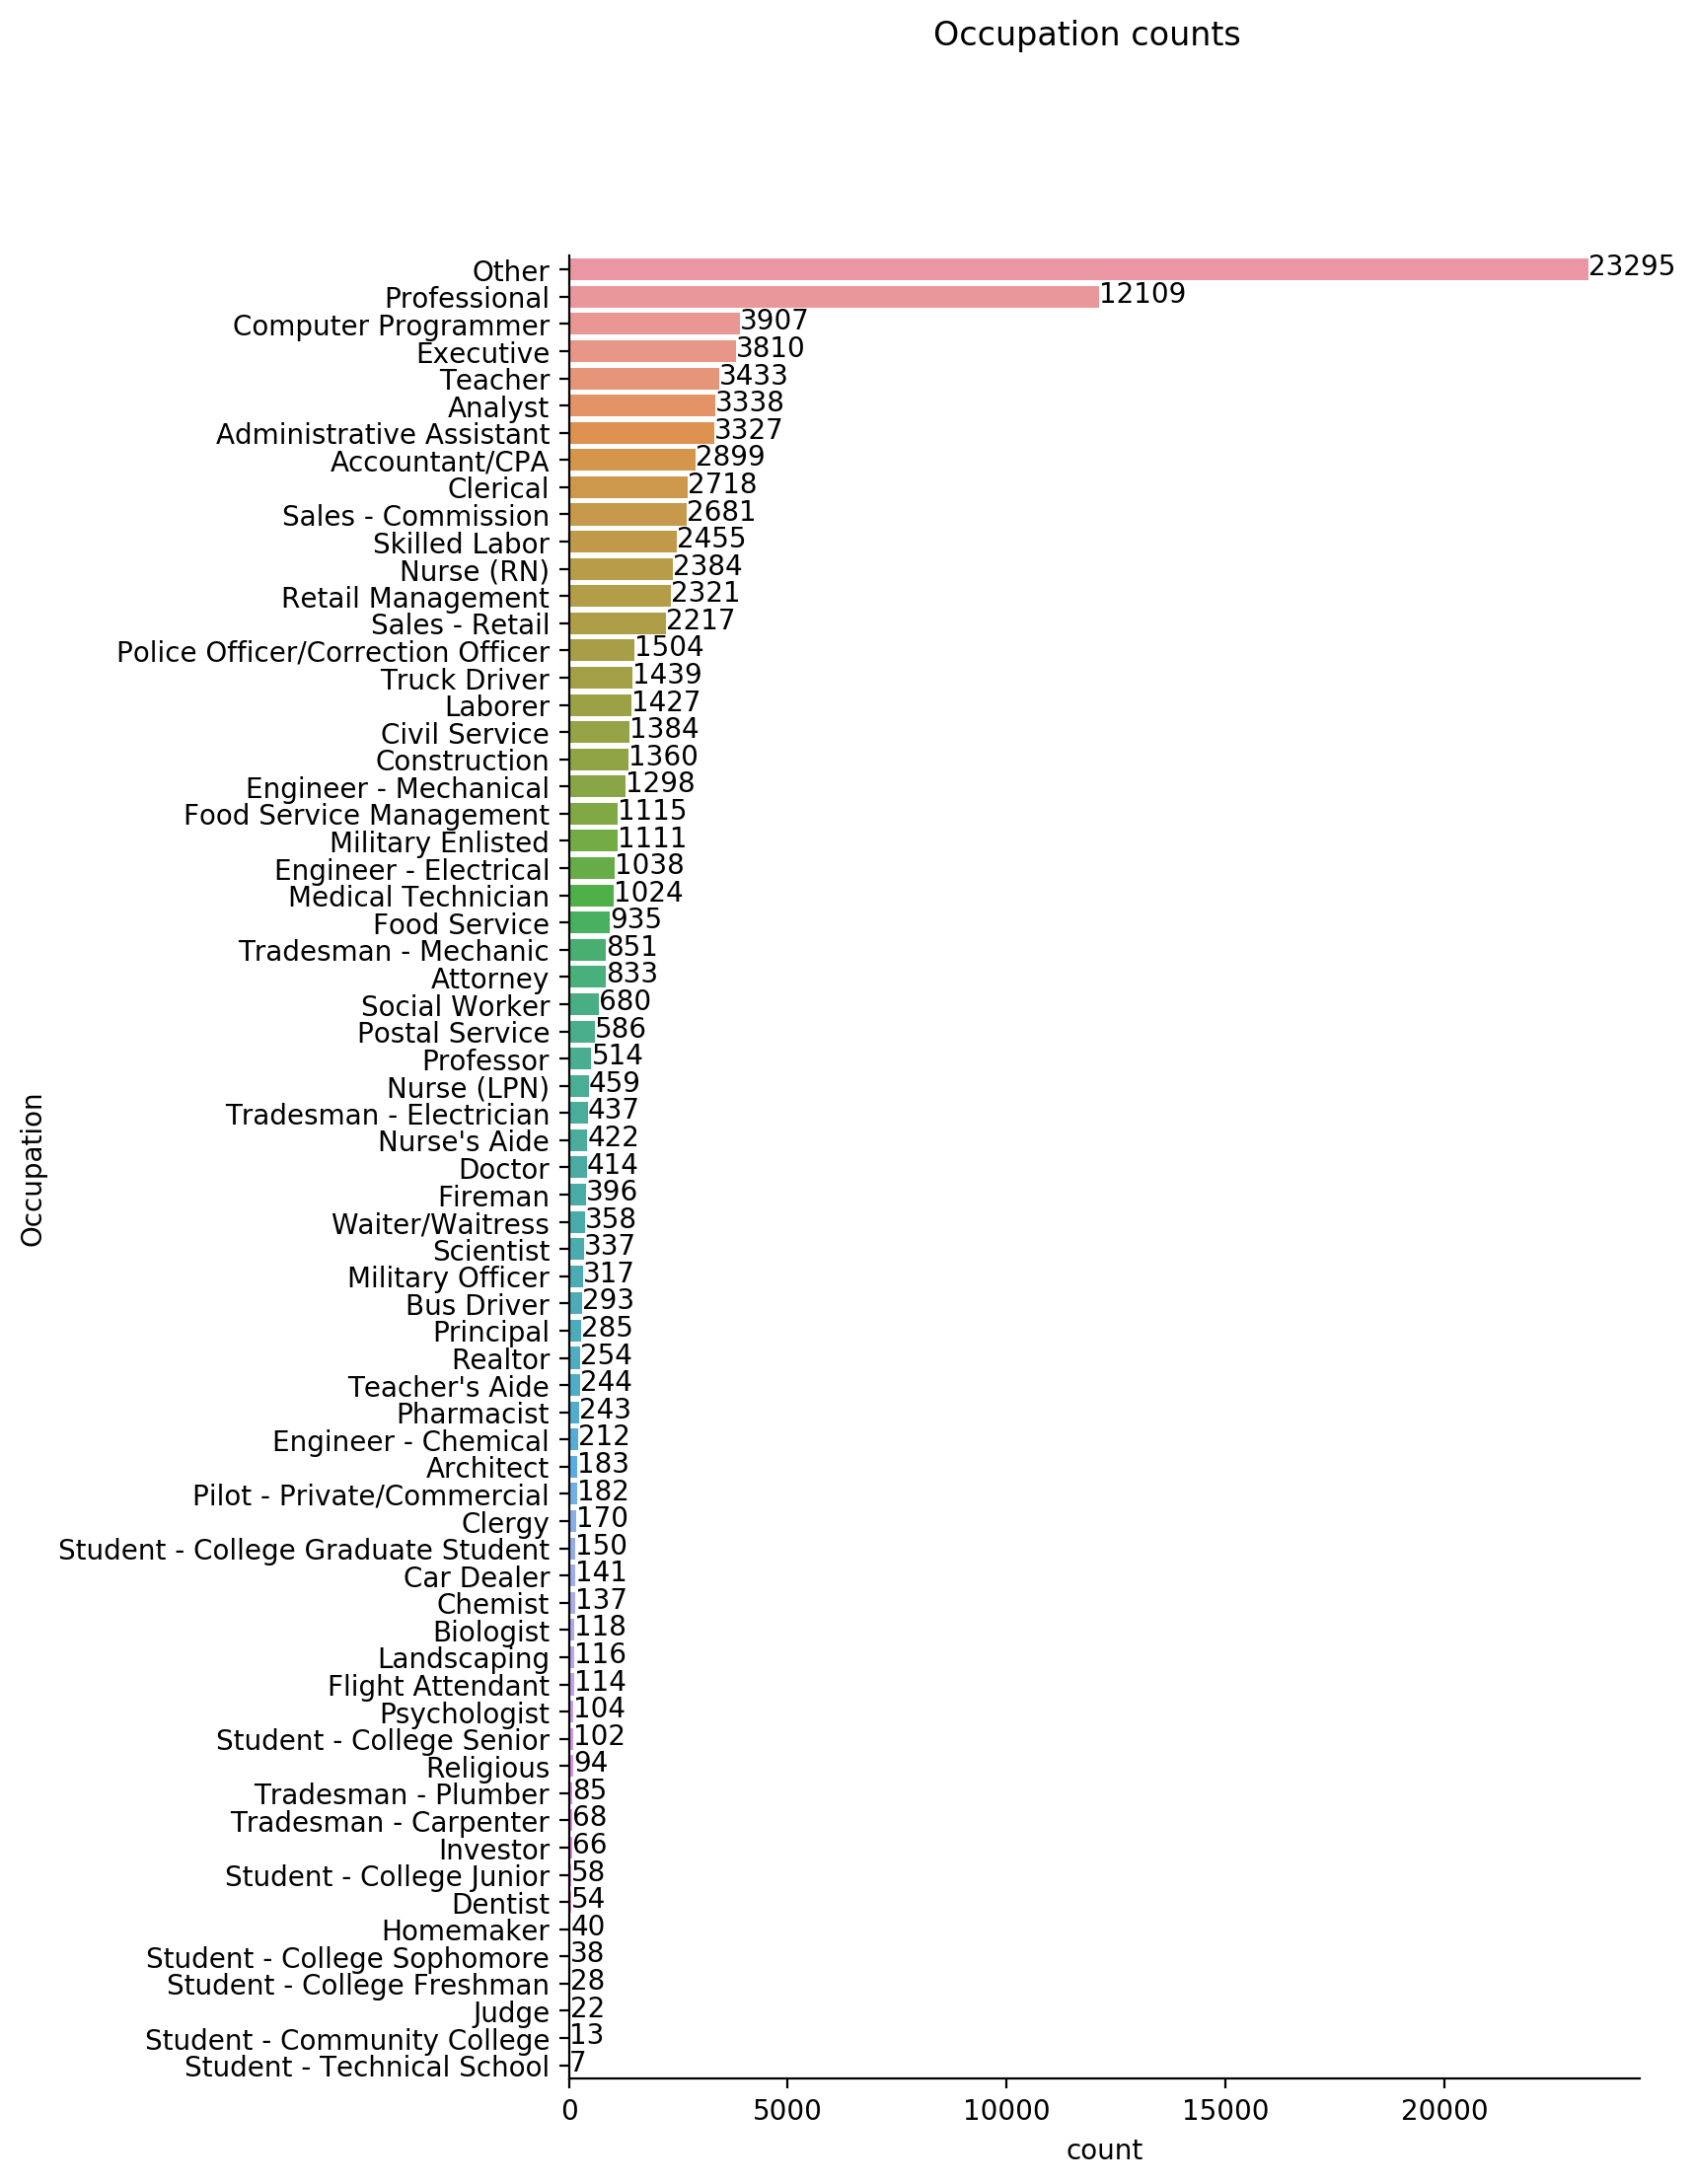

In [41]:
# subplots(row, col) , figsize(x,y)
fig, axes = plt.subplots(1,1, figsize=(7,12))
sb.despine(fig)

#axes.set(xscale="log")
g0 = sb.countplot(data=loans_df, 
                  y='Occupation',
                  order=loans_df.Occupation.value_counts().index)

# call function and plot values of graph
yplot_values(g0, '{:1.0f}')

fig.suptitle('Occupation counts')

plt.show();

The above graph shows several types of Occupations split to there appropriate position name, where as the top two occupations are ambigious and uninformative i.e. **Professionals** and **Other**.

As there several Occupations to display, it will be quite cumbersome to display all the statistical distributions of each, example seen below. 

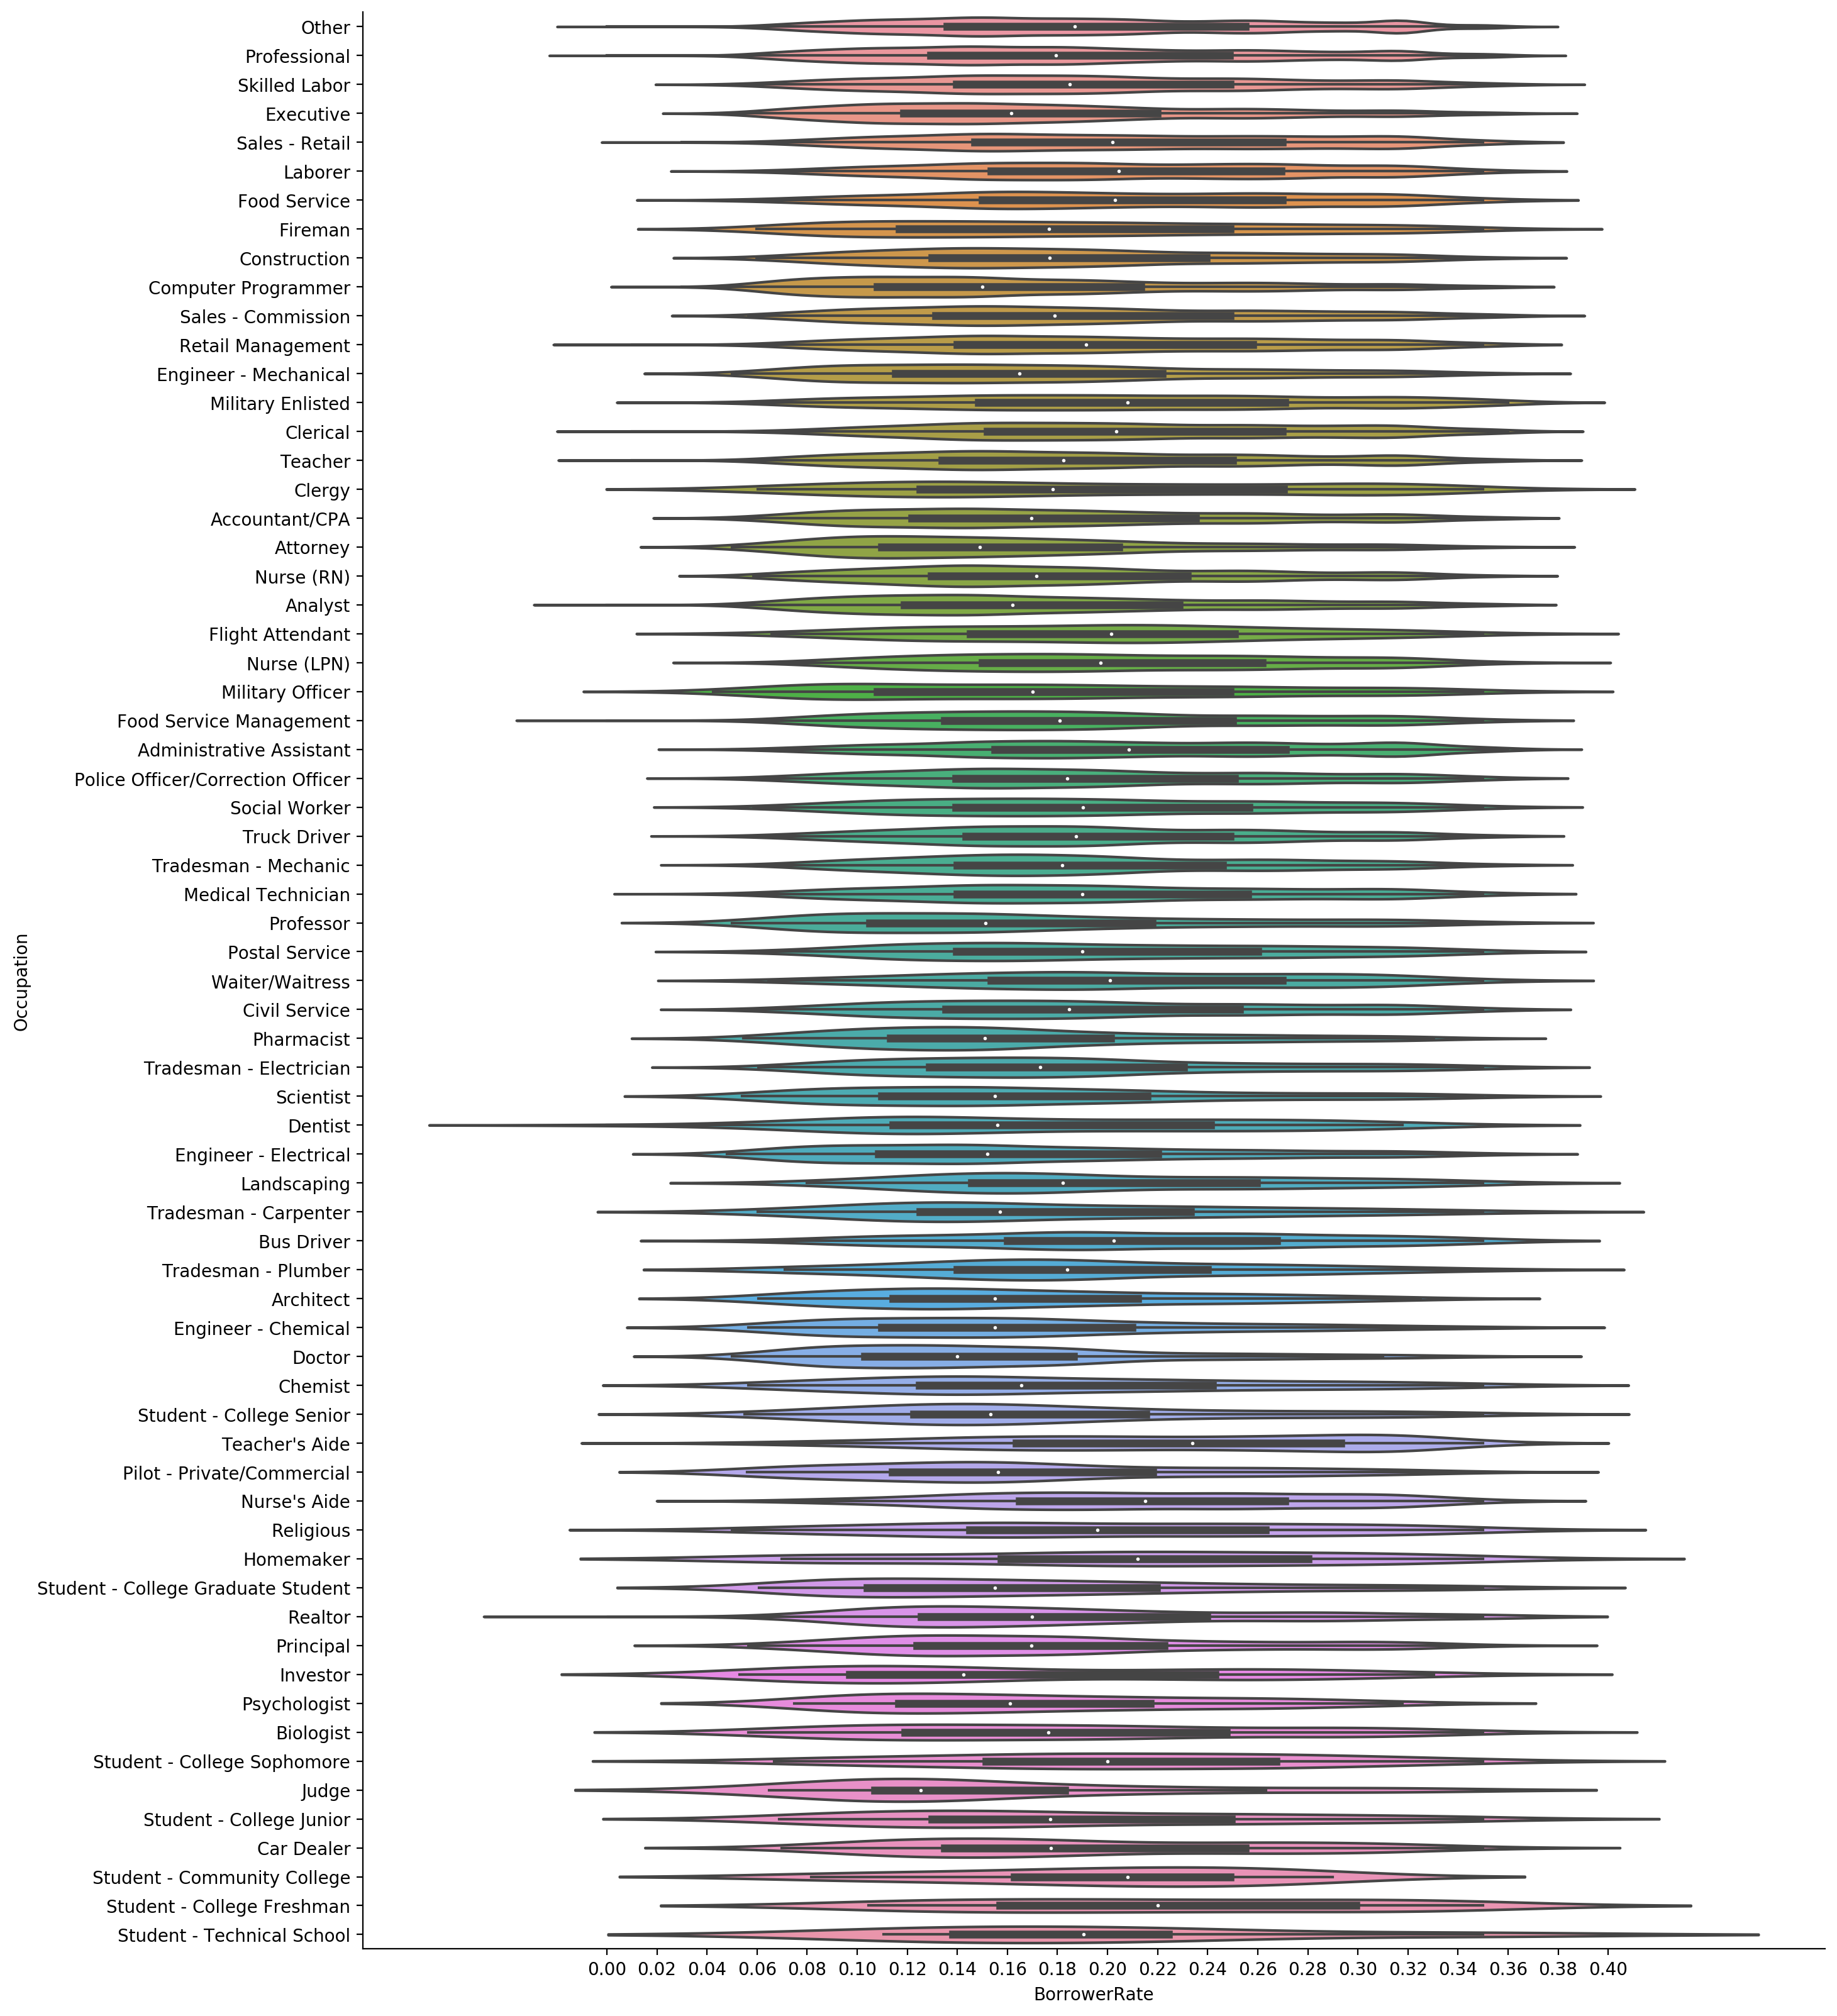

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(15, 20))
sb.despine(fig)

xticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.06, 0.02)

g0 = sb.violinplot(
      y = loans_df.Occupation,
      x = loans_df.BorrowerRate)
g0.set_xticks(xticks_range);

Violin plots dont provide a very accurate or good representation of the spread of occupations against borrow rate, evident with lines exceeding 0% as well as stretched plots not showing the width of per Occupation. Therefore the alternative will be boxplots as seen below.

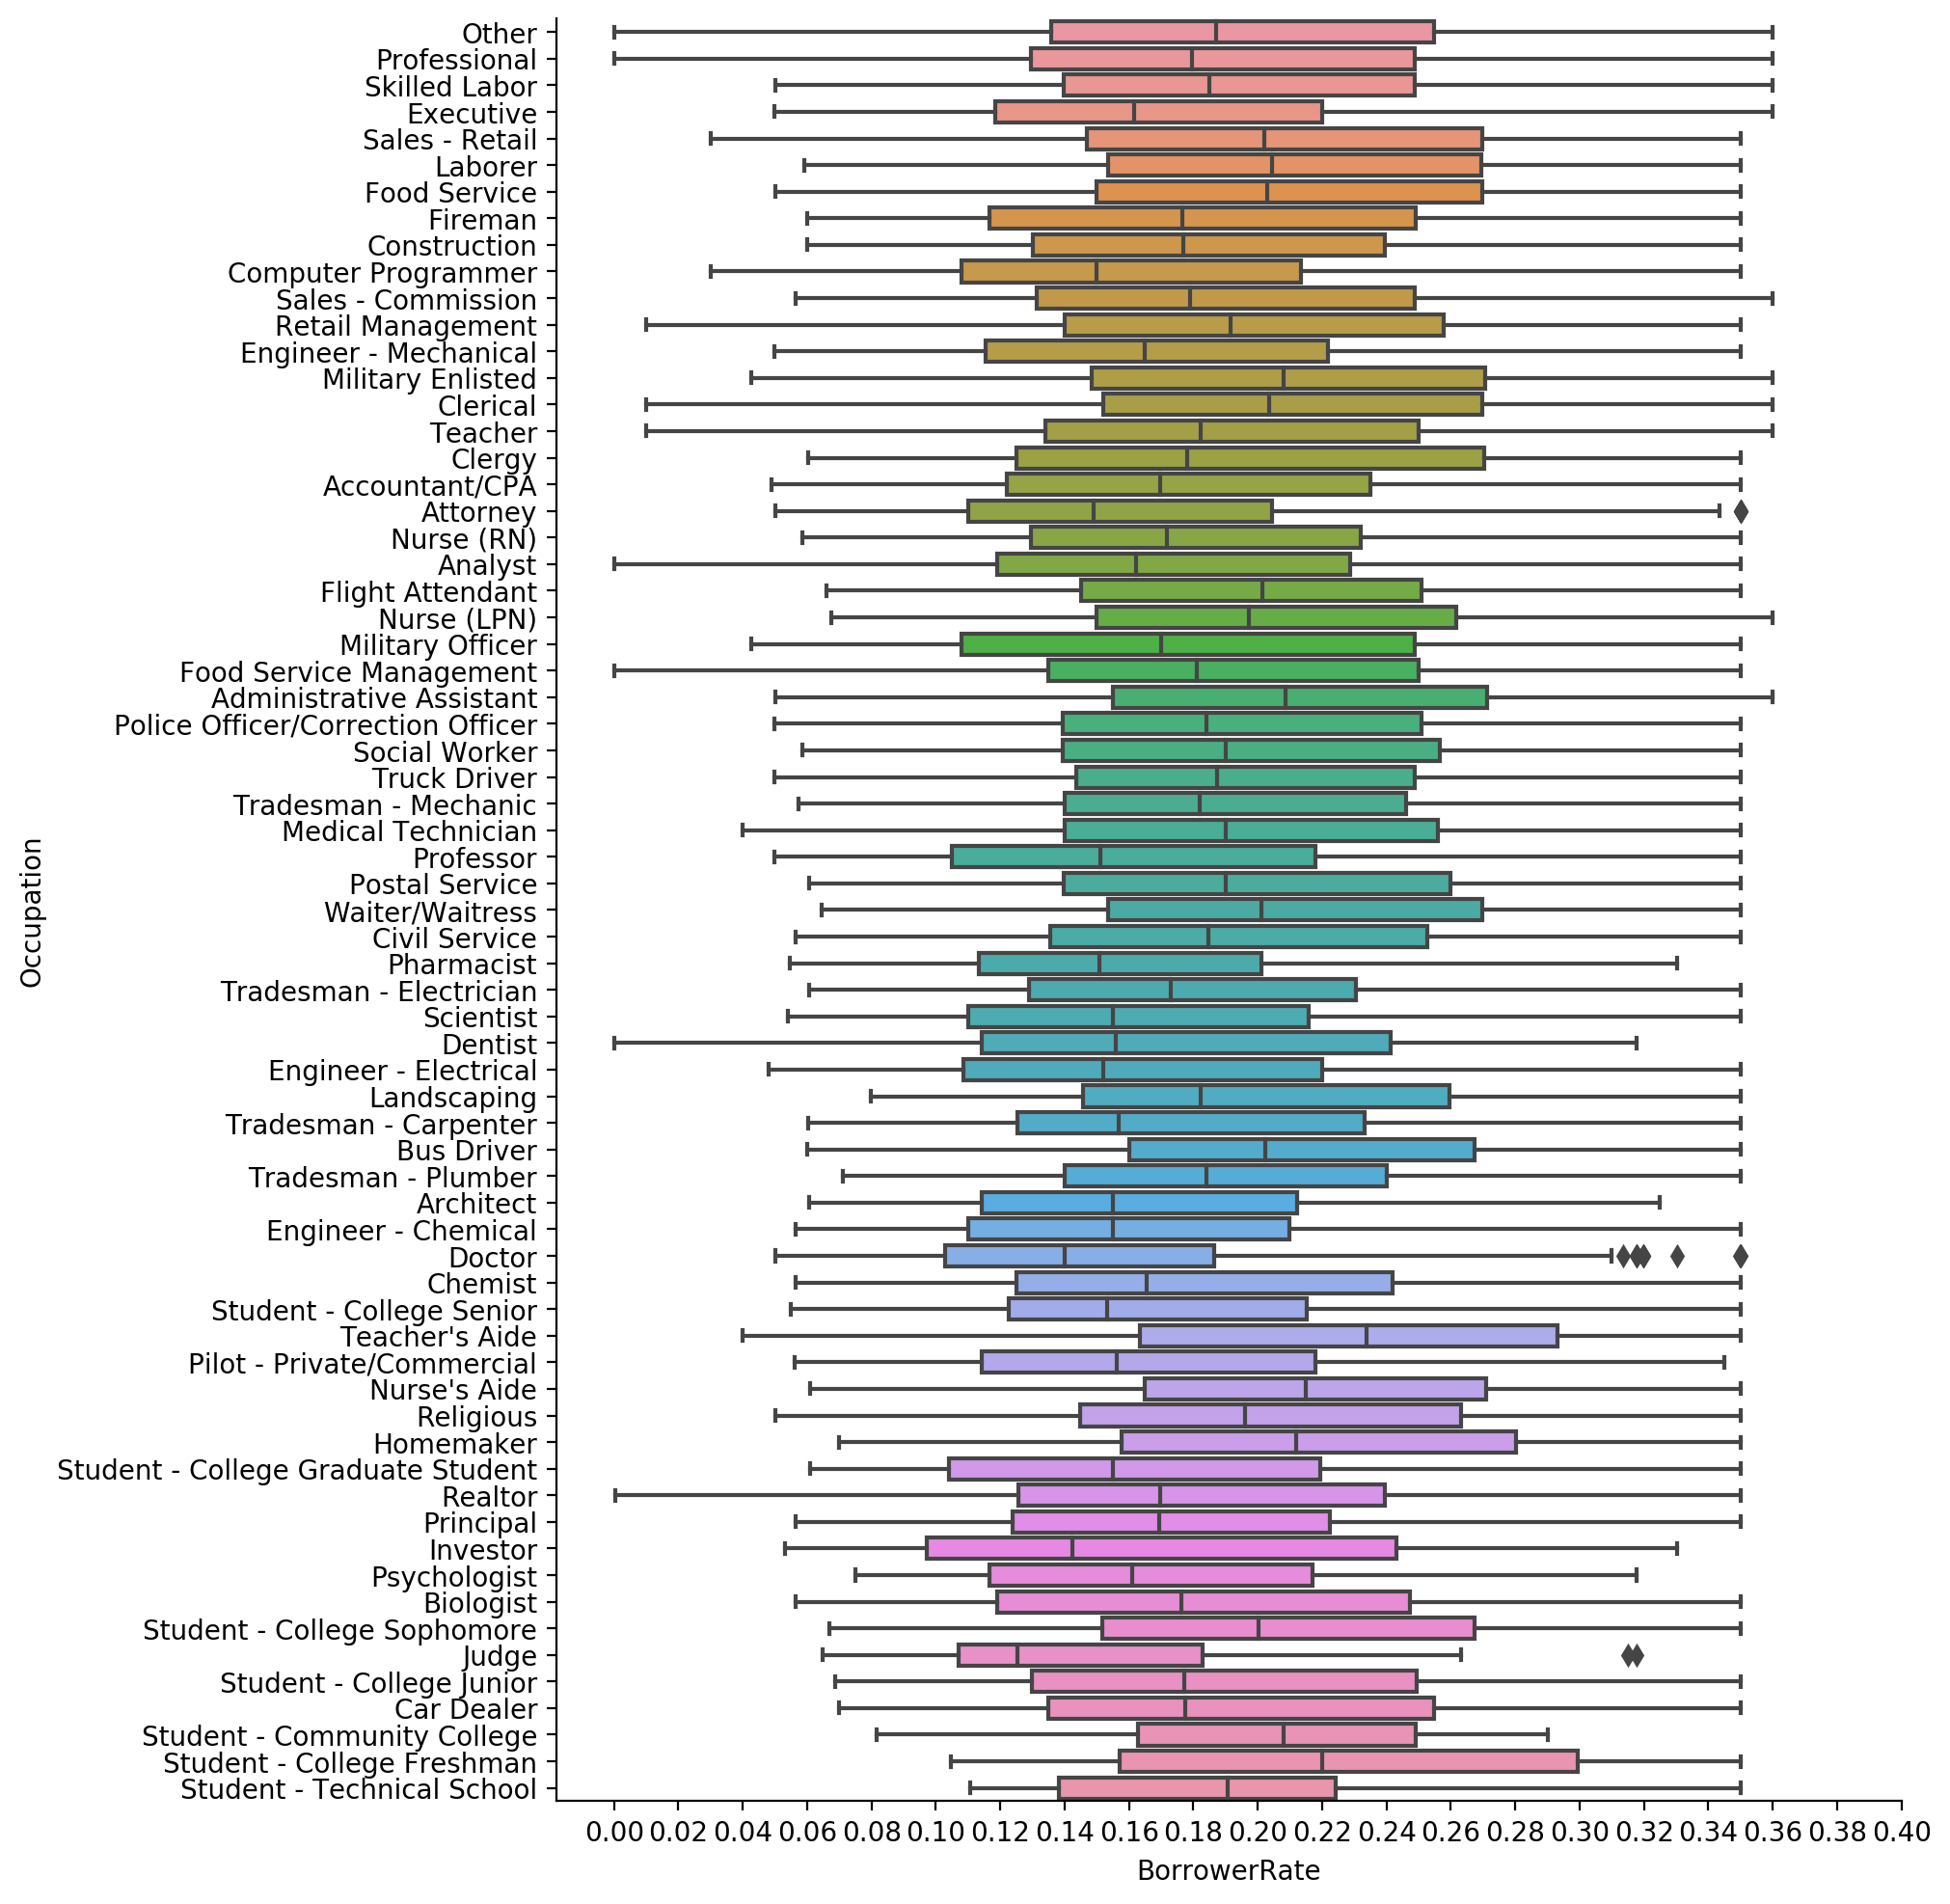

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(9, 12))
sb.despine(fig)

xticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.06, 0.02)

g0 = sb.boxplot(
      y= loans_df.Occupation,
      x = loans_df.BorrowerRate);
g0.set_xticks(xticks_range);

Using the box plot above, we can see a better capture of the **Occupations** relationship to Borrow Rate. It is particularly evident that **Occupations** do impact borrow rates evident with  **Judge** and **Doctors** appearing to have the lowest median borrow rates, where as **Student College Freshman** and **Teachers aid** appear to have the highest.

Due to the quantity of the Occupations list, a select few professions will be assessed to ensure a wide proportion of the population is captured. This selection is visual based with attempts to collect a low and high borrow rate of each field i.e. business, law, engineering, public service, admin, etc.


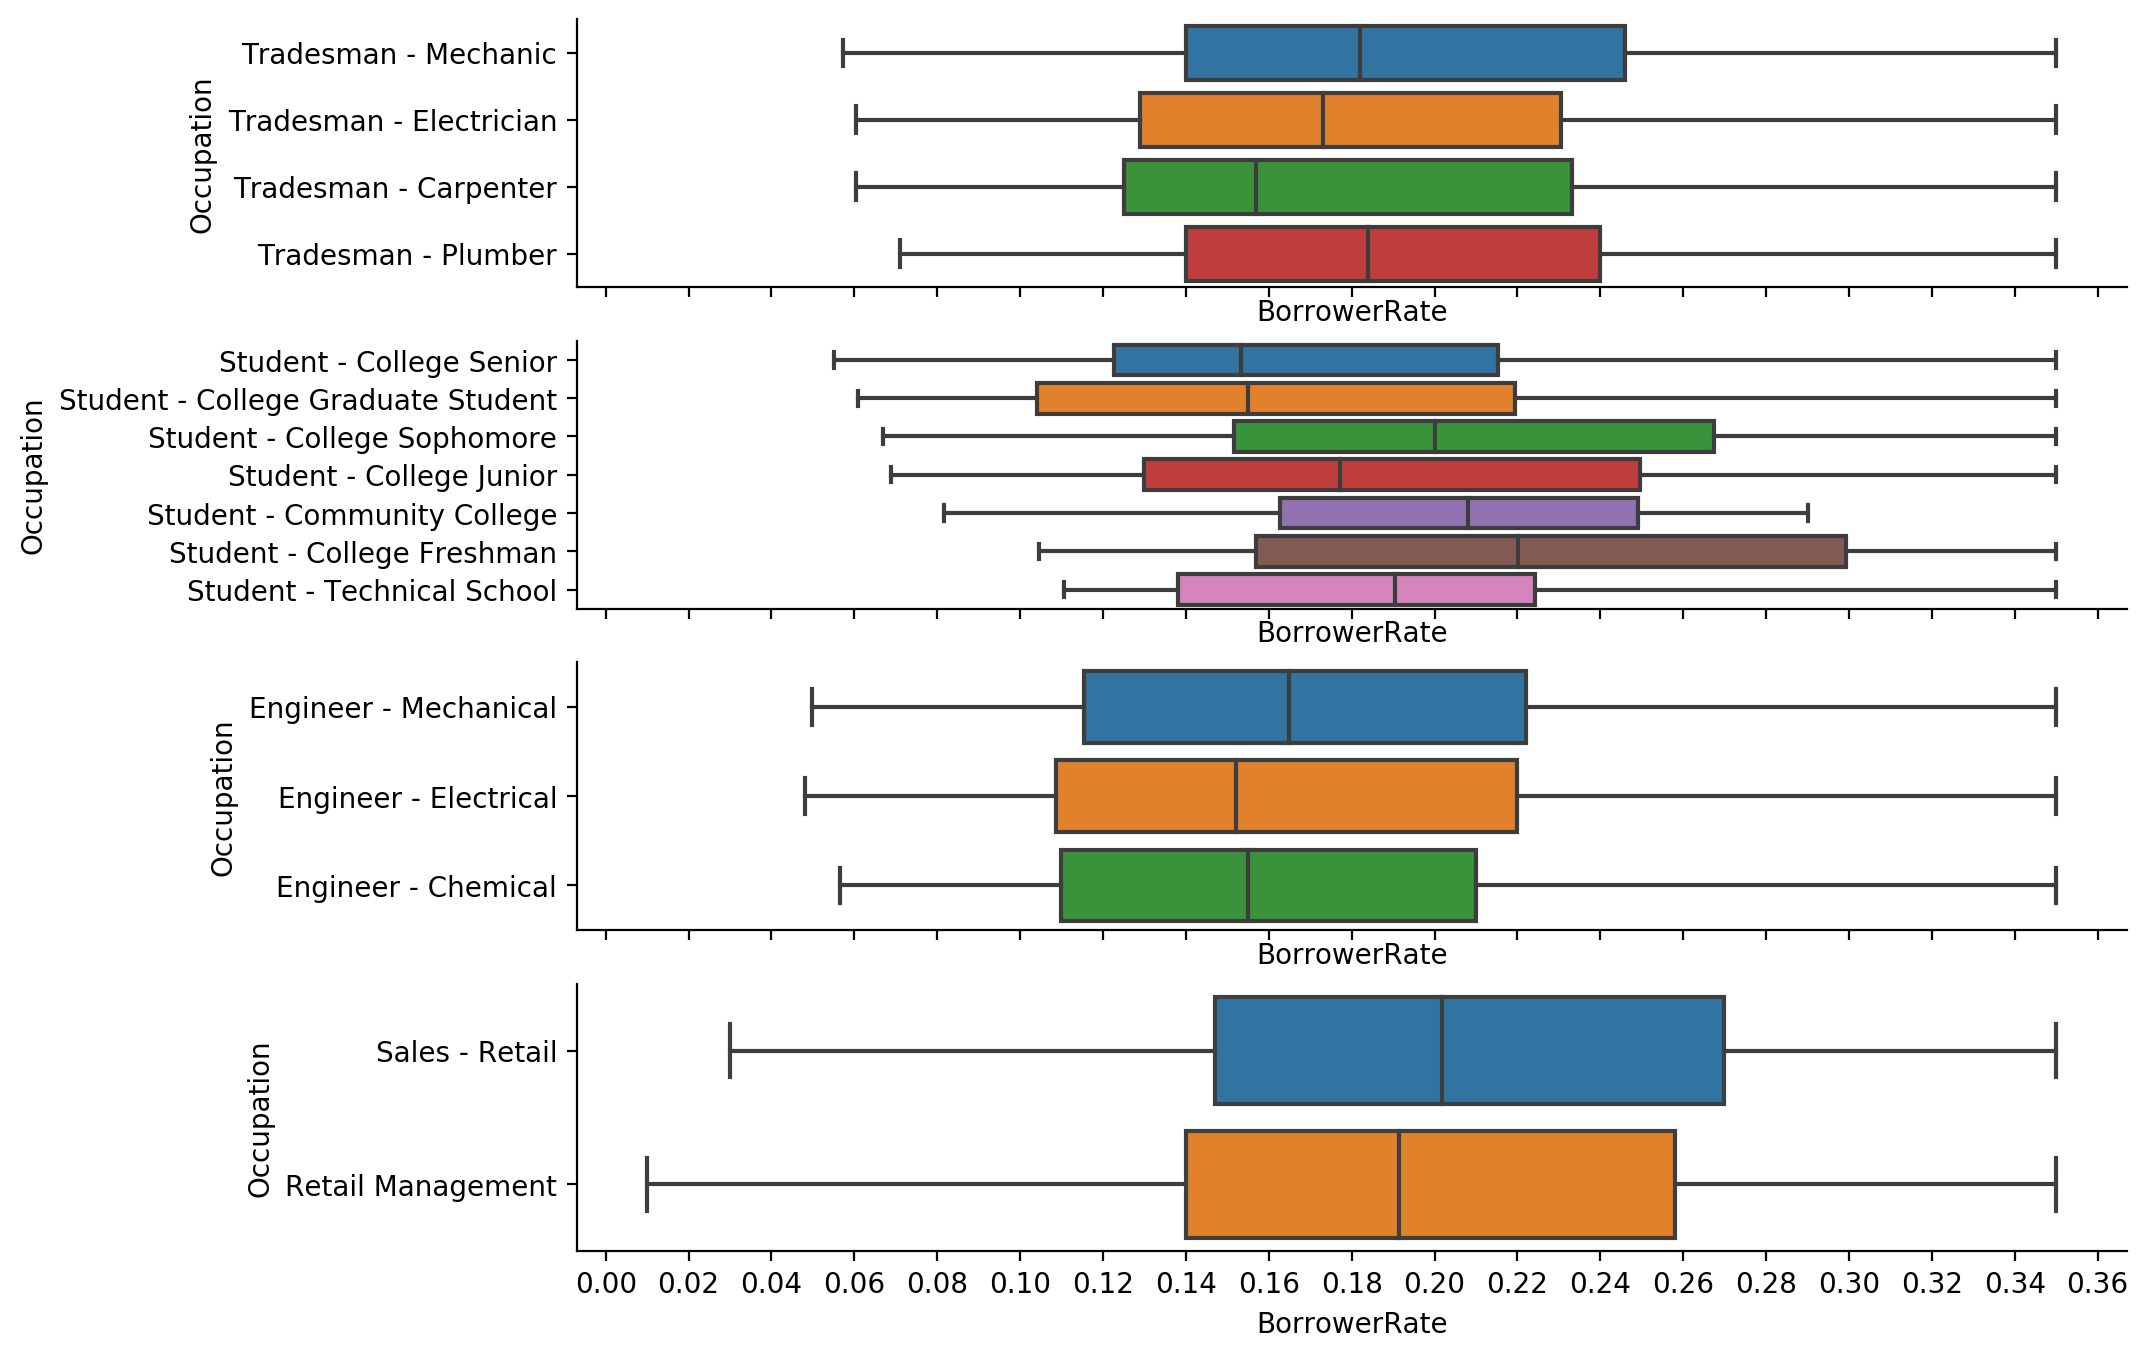

In [44]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
sb.despine(fig)

# filter by text
g0 = sb.boxplot(
      y= loans_df[loans_df['Occupation'].str.contains(pat='Trade',regex=False)].Occupation,
      x = loans_df.BorrowerRate,
      ax=axes[0])
# xticks_range defined in code block above
g0.set_xticks(xticks_range);

g1 = sb.boxplot(
      y= loans_df[loans_df['Occupation'].str.contains(pat='Student',regex=False)].Occupation,
      x = loans_df.BorrowerRate,
      ax=axes[1])

g2 = sb.boxplot(
      y= loans_df[loans_df['Occupation'].str.contains(pat='Engineer',regex=False)].Occupation,
      x = loans_df.BorrowerRate,
      ax=axes[2])

g3 = sb.boxplot(
      y= loans_df[loans_df['Occupation'].str.contains(pat='Retail',regex=False)].Occupation,
      x = loans_df.BorrowerRate,
      ax=axes[3])

In [45]:
key_occp_list = loans_df.Occupation.value_counts().index[2:11].to_list()

# custom selection of Occupations to incorporate one from each field of work
custom_occp_list = ['Police Officer/Correction Officer', 'Fireman', 
                    'Attorney', 'Engineer - Mechanical', 
                    'Doctor', 'Judge', 'Investor', 'Sales - Retail',
                    'Student - College Freshman', 'Student - College Graduate Student']

sample_occp_list = key_occp_list + custom_occp_list # append both lists into one
sample_occp_mask = loans_df.Occupation.isin(sample_occp_list)

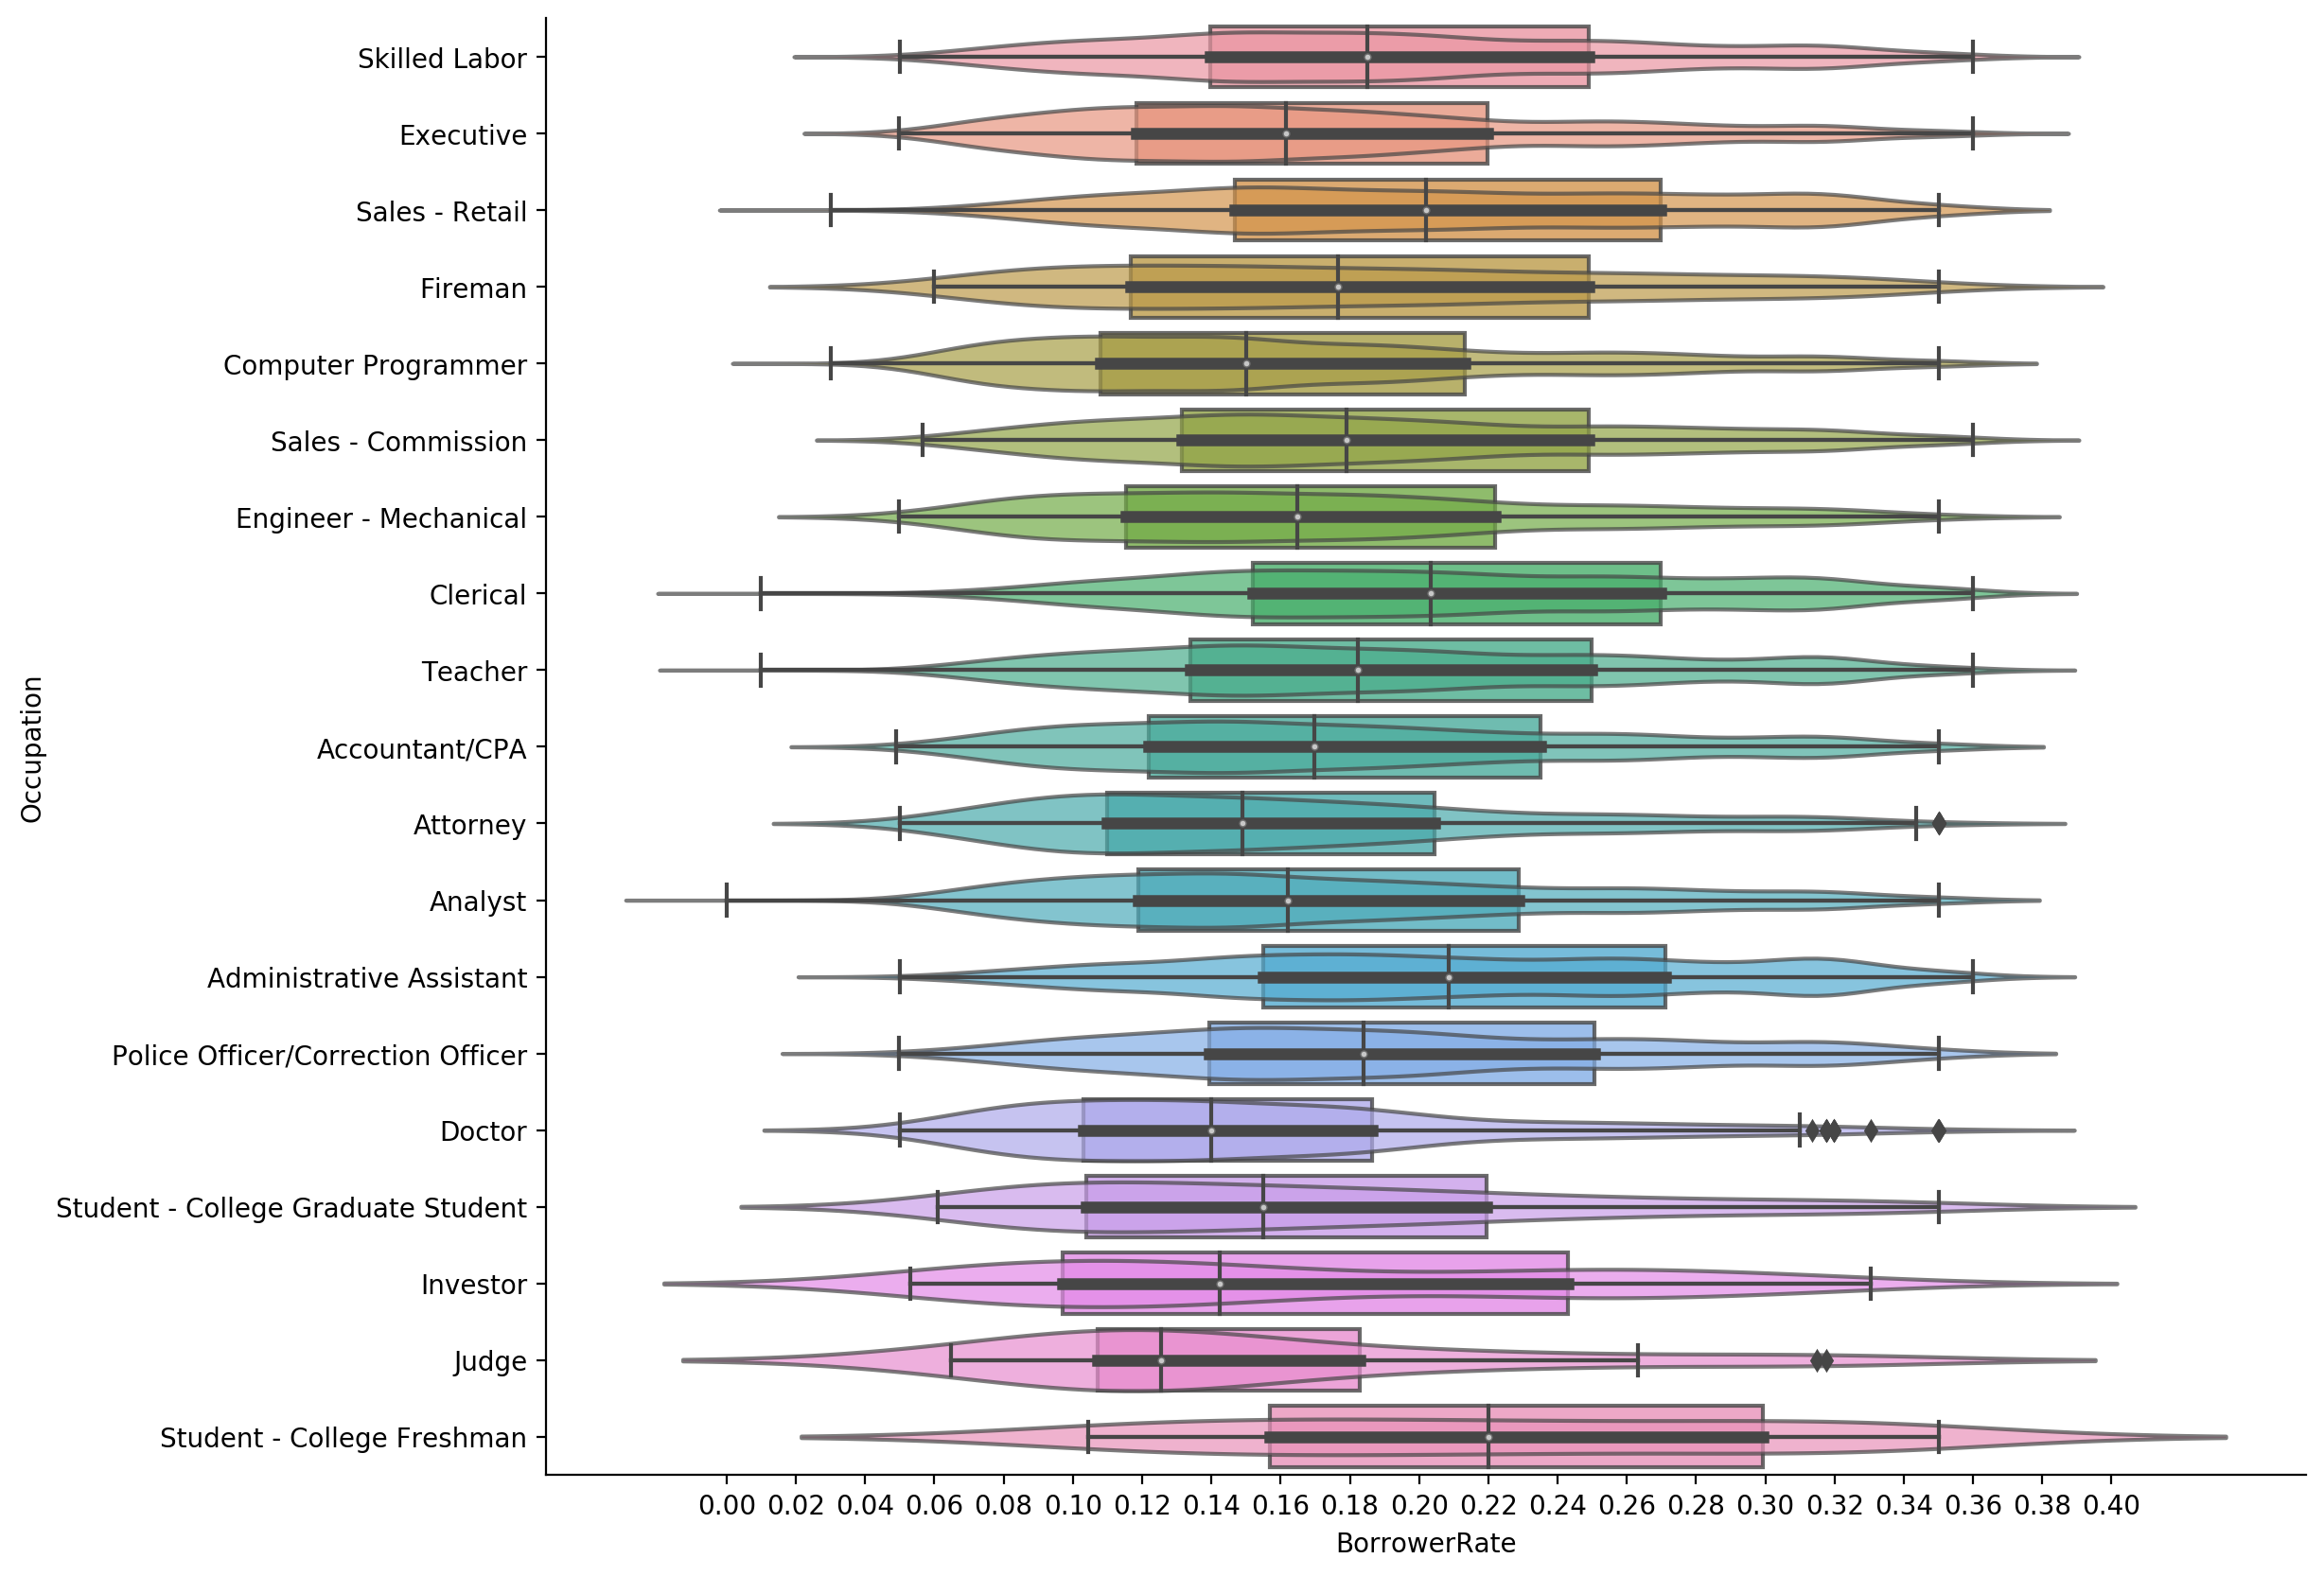

In [46]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
sb.despine(fig)

#set range of x axis
xticks_range = np.arange(0, loans_df[sample_occp_mask].BorrowerRate.max()+0.06, 0.02)

g0 = sb.violinplot(
        y = loans_df[sample_occp_mask].Occupation,
        x = loans_df.BorrowerRate);
plt.setp(g0.collections, alpha=.7);
g1 = sb.boxplot(
        y = loans_df[sample_occp_mask].Occupation,
        x = loans_df.BorrowerRate,
        boxprops=dict(alpha=.8));
g1.set_xticks(xticks_range)

plt.show();

Initially the two plots were on separate subplots which made comparing them side by side difficult. As such combining them onto the same plot allows for a better visual of the width of the violins, as well as the outliers, lower and upper quartiles shown by the box plot. It is apparent Occupations do impact the borrow rates issued out by Prosper, next variable to investigate is **Income Range** which directly ties to the amount each occupation is paid.


Prior to dropping **Other** and **Professional** occupations, an investigation into the spread of data will be performed to determine how it sits when compared against **Borrower Rate**.

In [47]:
# taking note of current dataframe size
loans_df.shape

(94754, 16)

In [48]:
# the size based on the above filter
loans_df[sample_occp_mask].shape

(35496, 16)

In [49]:
# the size based on Other and Professional
sample_misc_loans = loans_df[loans_df.Occupation.isin(['Other', 'Professional'])] # get Occupations with Other and Professional
sample_misc_loans.shape

(35404, 16)

In [50]:
# the size of the remaining excluding other and Professional
sample_remain_loans = loans_df[(loans_df.Occupation!='Other') & (loans_df.Occupation!='Professional')]
sample_remain_loans.shape

(59350, 16)

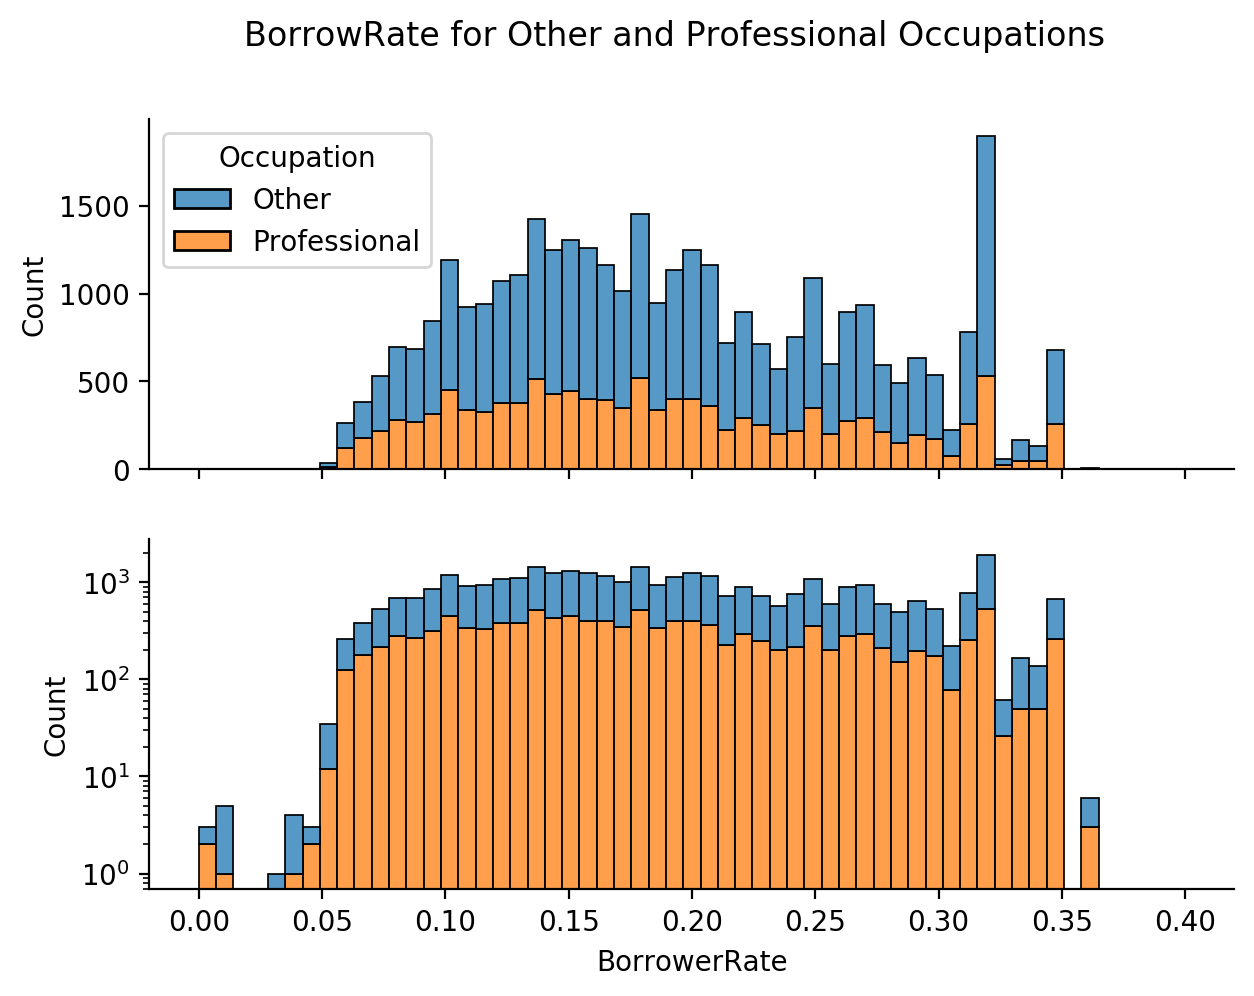

In [51]:
# plot to show the distribution of Other and Professional occupations
# subplots(row, col)
fig, axes = plt.subplots(2,1, figsize=(7,5), sharex=True)
sb.despine(fig)

# graph 1 - distribution of borrow rates
g1 = sb.histplot(sample_misc_loans, # new sample data frame above
        x='BorrowerRate',
        binrange=(0, 0.4),
        element='bars',
        hue='Occupation',
        multiple='stack',
        ax=axes[0]);

# graph 2 - log scale transformation of of graph 1 to assist in visualizing smaller values
axes[1].set(yscale="log")
g2 = sb.histplot(sample_misc_loans, 
        x='BorrowerRate',
        binrange=(0, 0.4), 
        element='bars',
        hue='Occupation',
        multiple='stack',
        ax=axes[1],
        legend=False);

# TODO - consolidate legend
fig.suptitle('BorrowRate for Other and Professional Occupations')

plt.show();

Before dropping **Other** and **Professional** occupations from the dataframe, we observe the plot above showing a normal distribution. and its potential influence to BorrowRate. The peak at ~32% would appear to the usual BorrowRate provided by Prosper.

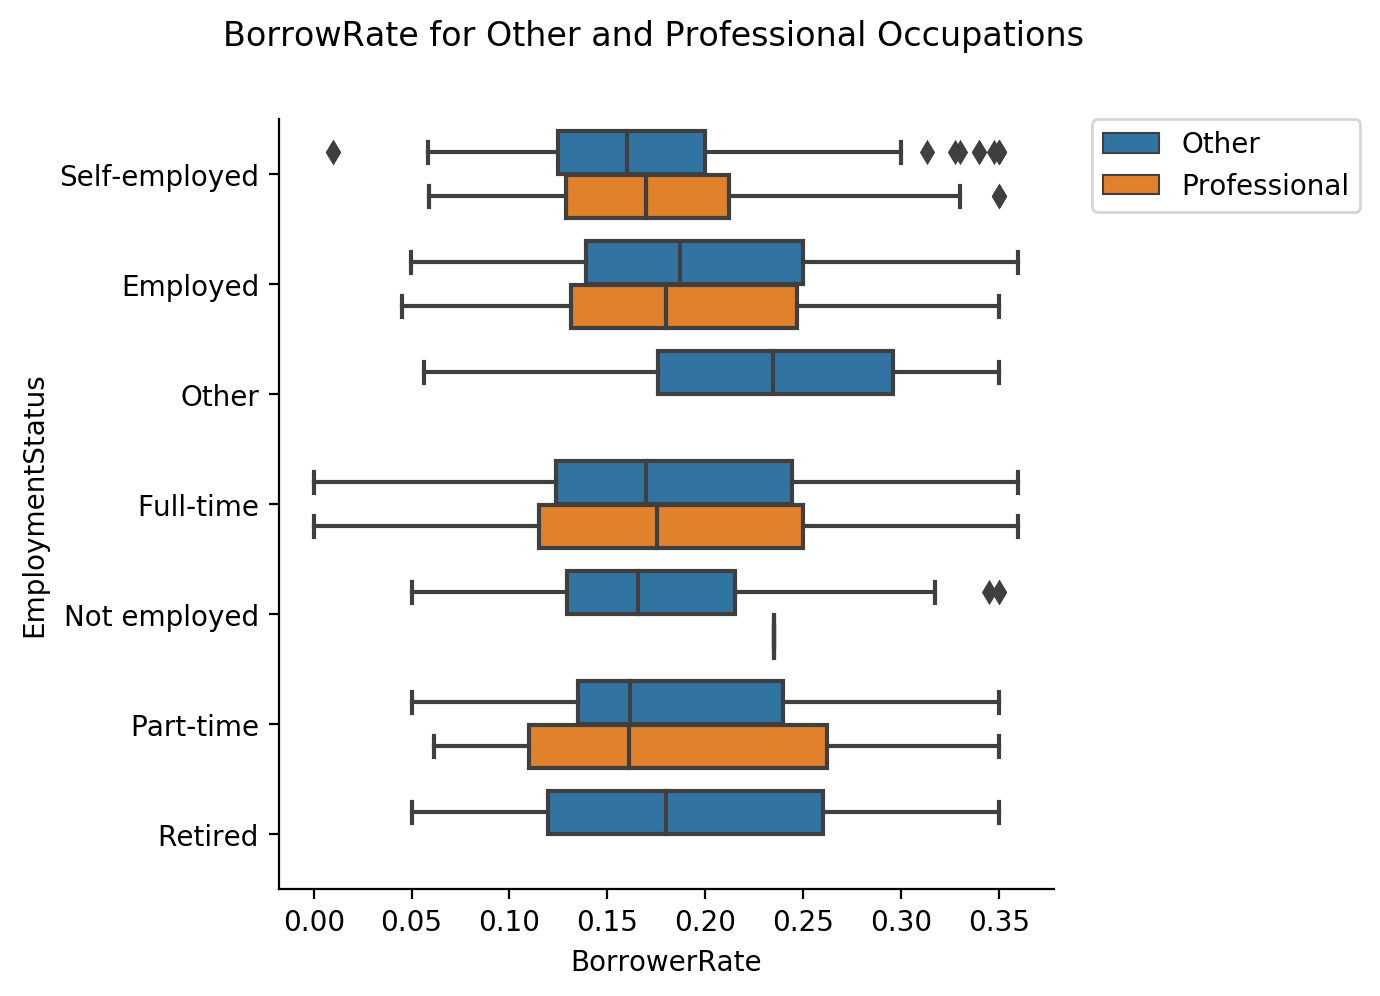

In [52]:
fig, axes = plt.subplots(1,1, figsize=(5,5))
sb.despine(fig)

xtick_range = np.arange(0, sample_misc_loans.BorrowerRate.max()+0.06, 0.02)

g0 = sb.boxplot(data = sample_misc_loans,
                x = 'BorrowerRate',
                y = 'EmploymentStatus',
                hue='Occupation'
                );
g0.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.suptitle('BorrowRate for Other and Professional Occupations')

plt.show;

#### 2.1.4 IncomeRange

In [53]:
loans_df.IncomeRange.value_counts()

$50,000-74,999    28614
$25,000-49,999    28609
$100,000+         15870
$75,000-99,999    15739
$1-24,999          5866
Not employed         56
$0                    0
Name: IncomeRange, dtype: int64

Income range has already been categorized earlier in the exploration. However requires cleaning as evident with $0 and Not employed values.

In [54]:
# replace incorrect data
loans_df.IncomeRange = loans_df.IncomeRange.replace(['Not employed'], '$0')

In [55]:
# verify replacement was correct
loans_df.IncomeRange.value_counts()

$50,000-74,999    28614
$25,000-49,999    28609
$100,000+         15870
$75,000-99,999    15739
$1-24,999          5866
$0                   56
Name: IncomeRange, dtype: int64

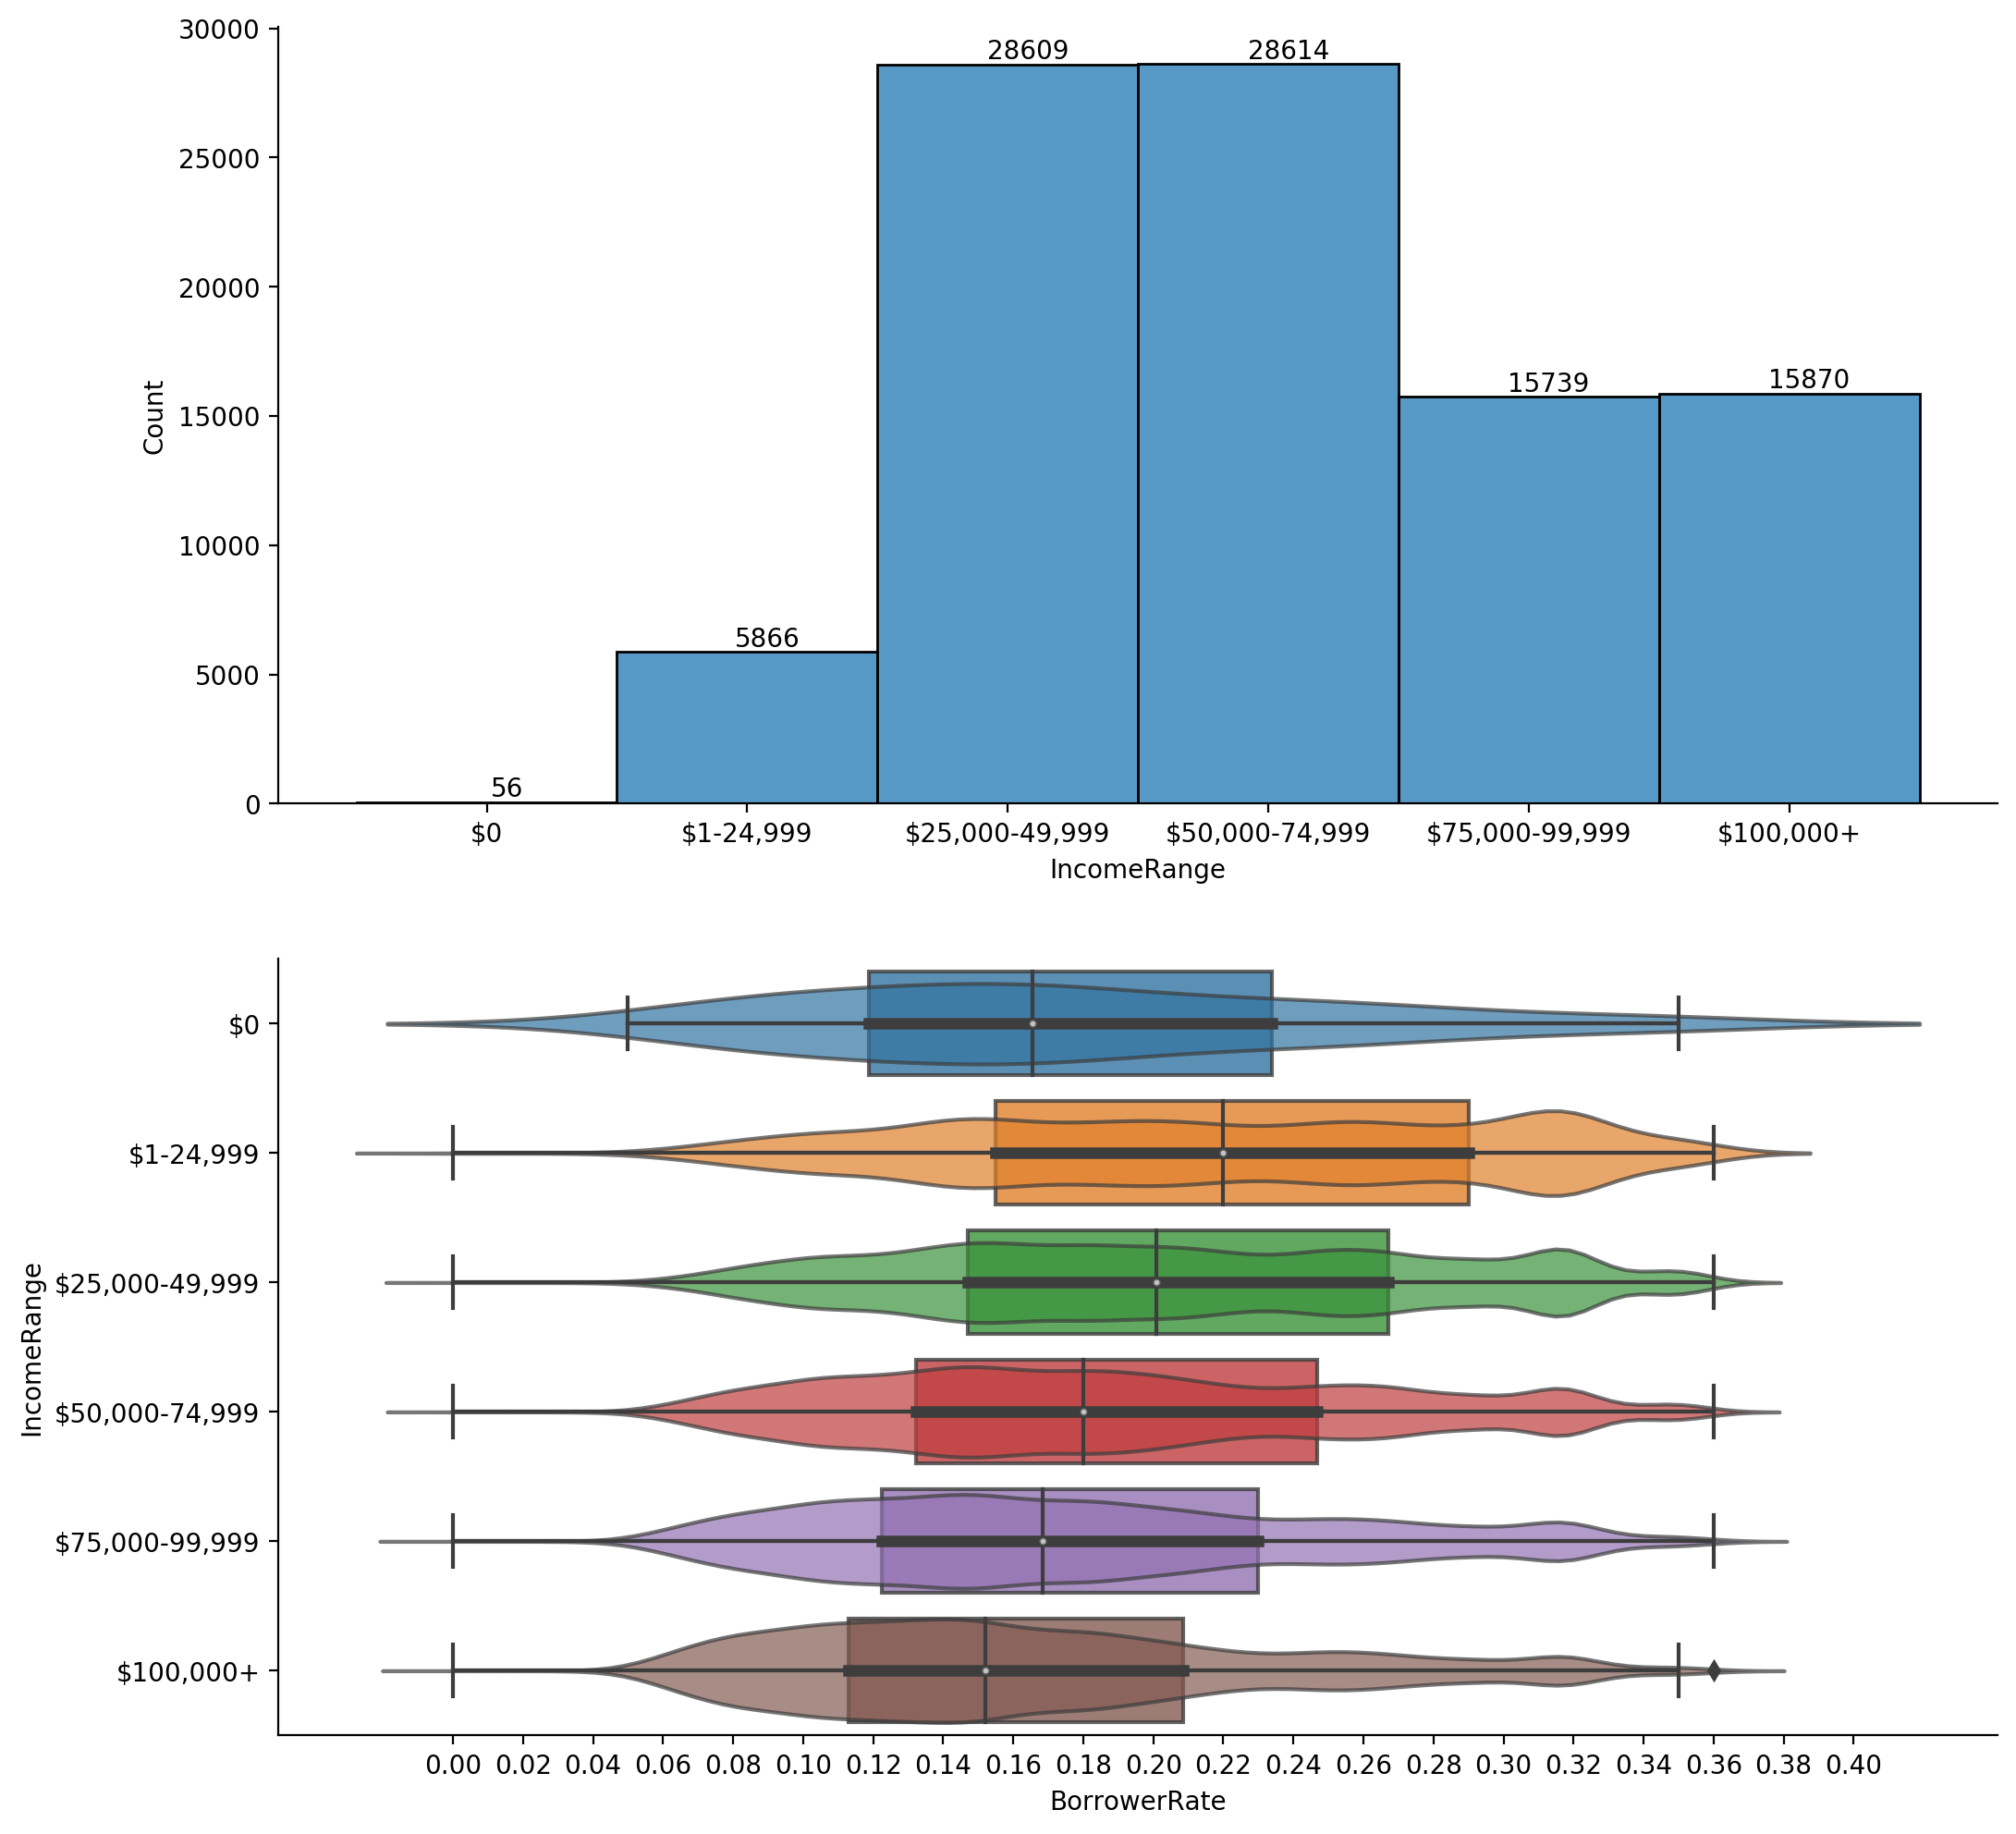

In [56]:
fig, axes = plt.subplots(2,1, figsize=(12, 12) )
sb.despine(fig)

# graph 1 - distribution of Income range
g0 = sb.histplot(
    data = loans_df, # new sample data frame above
    x = 'IncomeRange',
    element = 'bars',
    multiple = 'stack',
    ax = axes[0]);
xplot_values(g0, '{:1.0f}');

xticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.06, 0.02)
# graph 2 - distribution of Income range
g1 = sb.violinplot(
    data = loans_df,
    x = 'BorrowerRate',
    y = 'IncomeRange',
    ax = axes[1]);
plt.setp(g1.collections, alpha=.7)
g1 = sb.boxplot(
    data = loans_df,
    x = 'BorrowerRate',
    y = 'IncomeRange',
    ax = axes[1],
    boxprops=dict(alpha=.8));
g1.set_xticks(xticks_range);

From the plots above we can a left skewed distribution, with the majority of incomes ranging almost equally between \$25000-49999 and \$50000-75000.

The plot of **BorrowerRate** against **IncomeRange** reveals a pattern reinforcing the idea that Income affects the Borrow rate provided by Prosper, explicitly that the higher your income guarantees you will have a lower borrow rate on your loan.
The exception to the above statement is for the \$0 income where they are provided a reasonably low interest rate, despite not having the means to pay it off.

/var/mobile/Containers/Data/Application/2EF004AF-1408-43E2-B92B-C76A4D43AA52/Documents/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


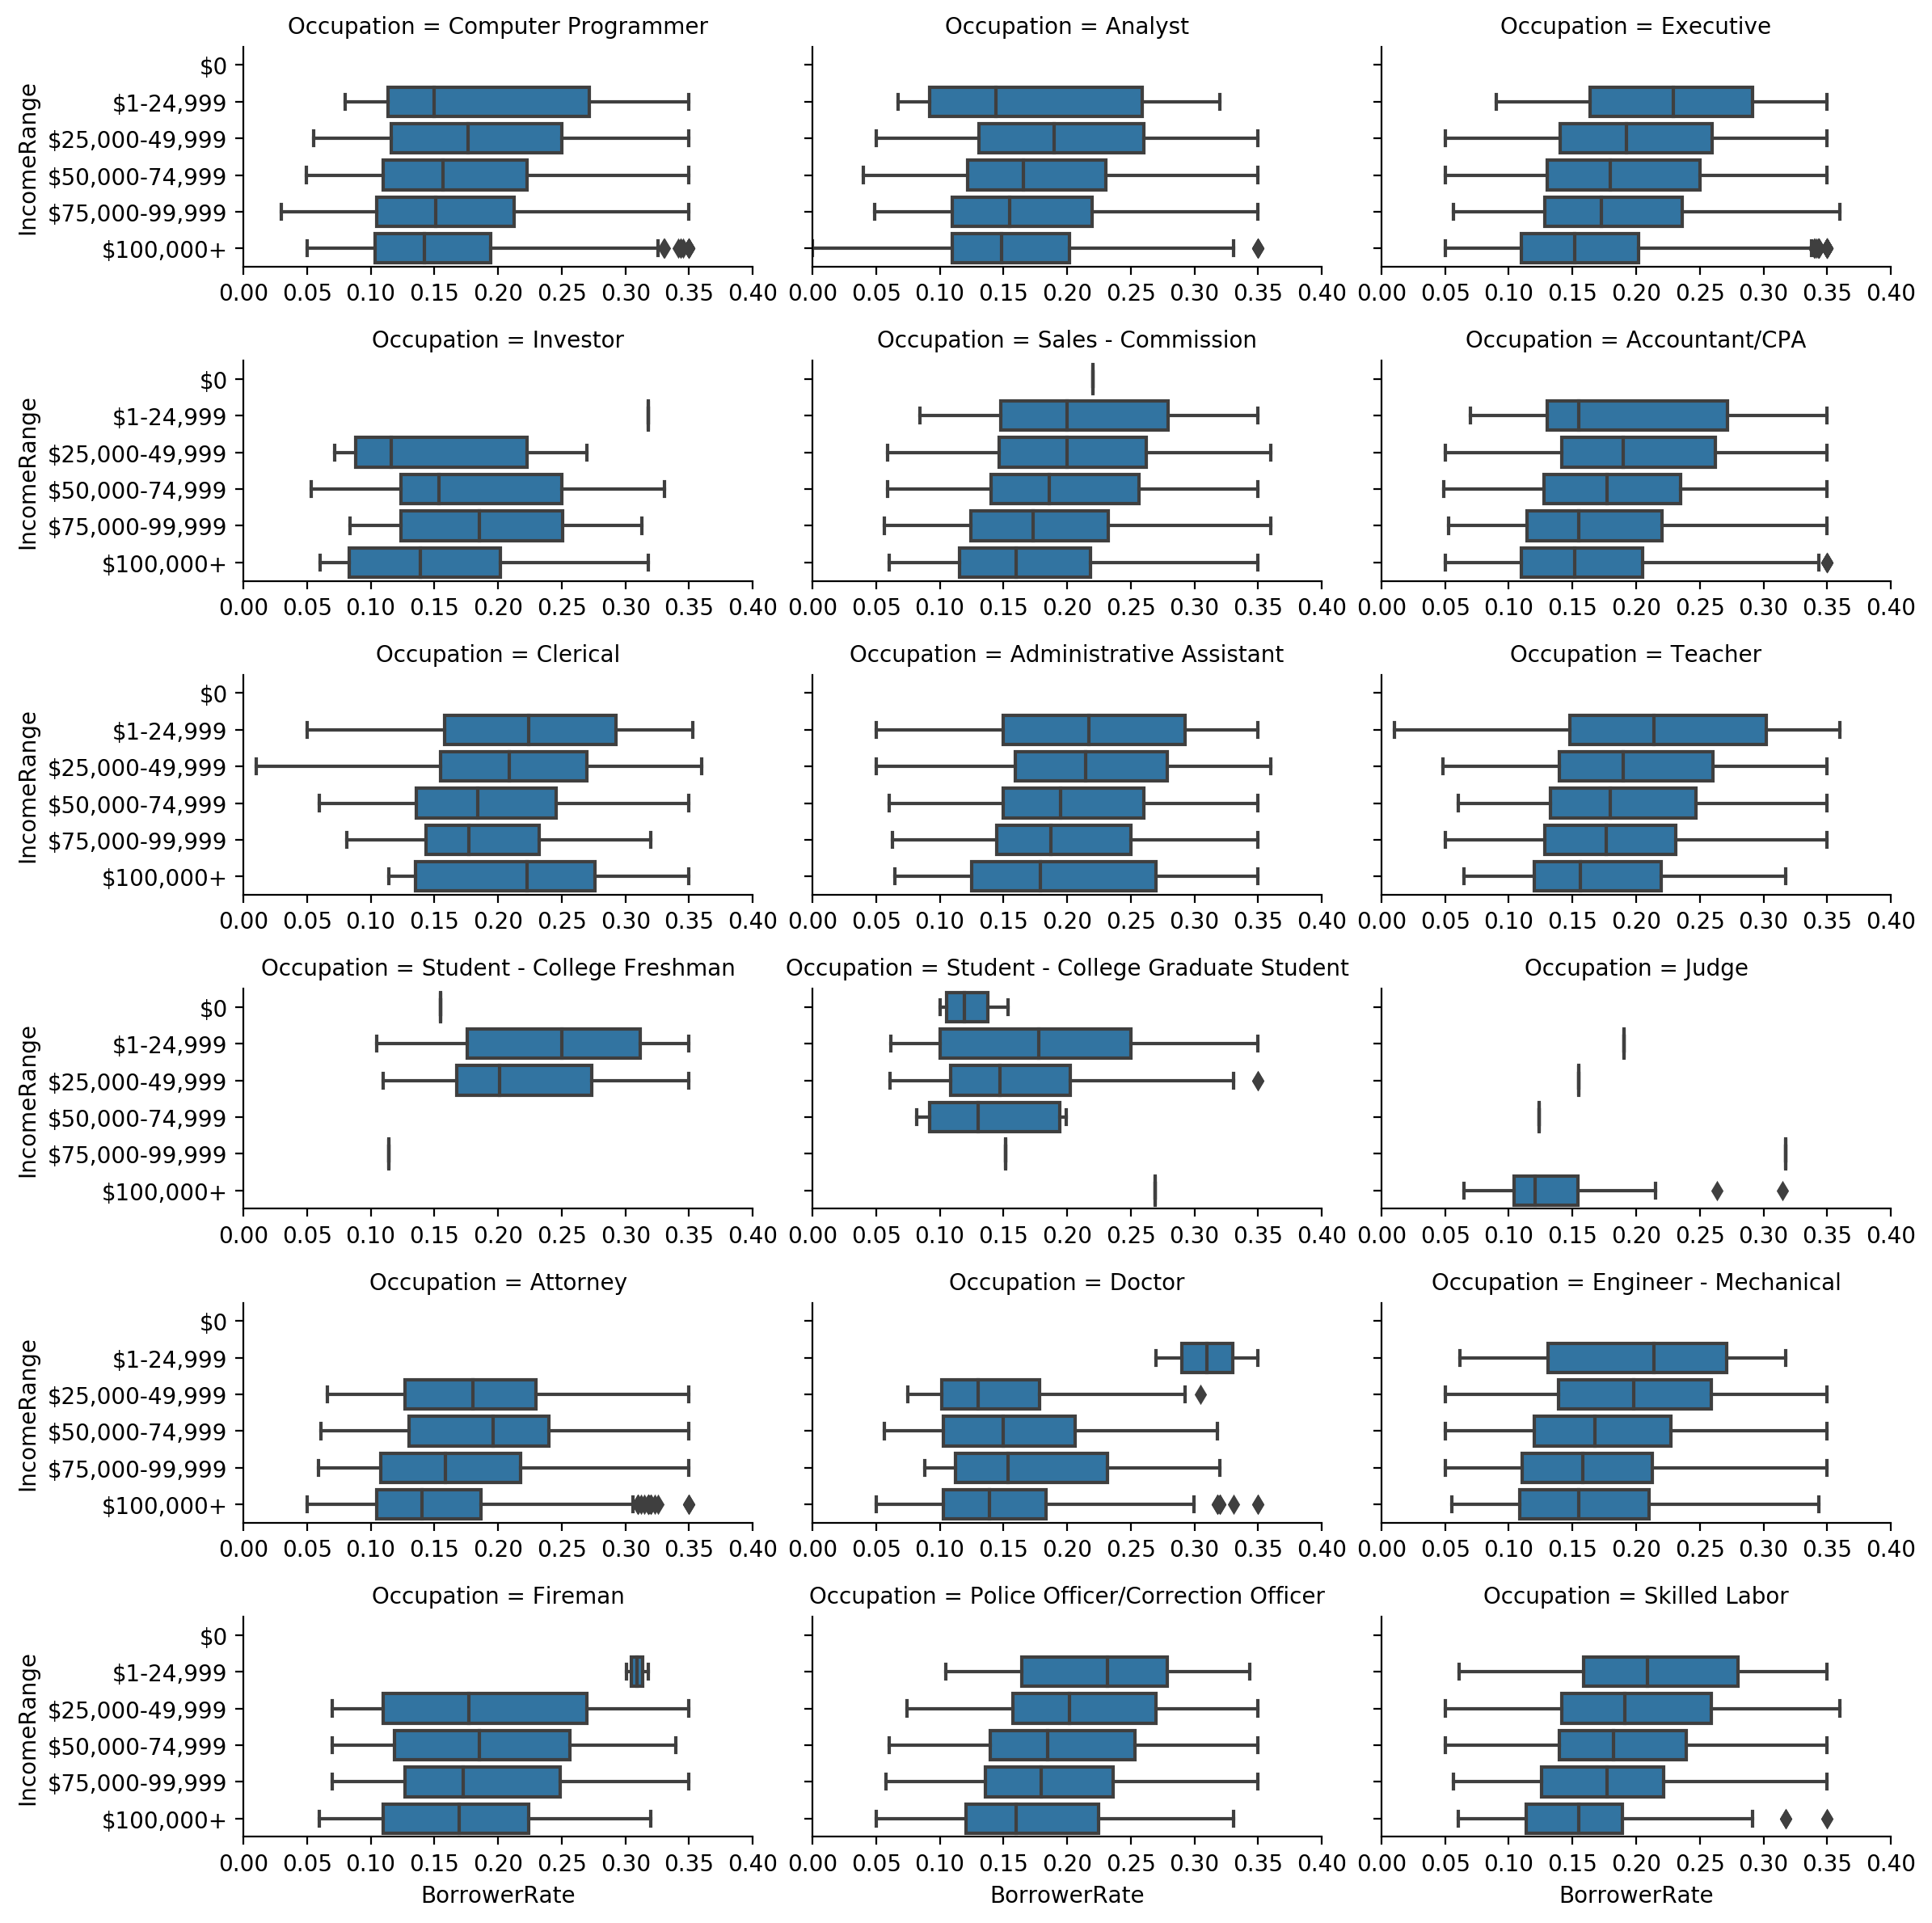

In [57]:
sb.despine(fig)

Occ_order=['Computer Programmer', 'Analyst',
           'Executive', 'Investor', 'Sales - Commission',
           'Accountant/CPA', 'Clerical', 'Administrative Assistant',
           'Teacher', 'Student - College Freshman', 'Student - College Graduate Student',
           'Judge', 'Attorney', 'Doctor', 'Engineer - Mechanical',
           'Fireman', 'Police Officer/Correction Officer', 'Skilled Labor']

# re-use previous list of Occupations to produce a multi-variate plot 

xticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.05, 0.05)
g0 = sb.FacetGrid(data=loans_df[sample_occp_mask], col = 'Occupation',
                  col_wrap = 3, # number of columns before starting a new row
                  col_order = Occ_order,
                  sharex=False,
                  height=2,
                  aspect=2,
                  xlim=(0, 0.4),
                  margin_titles = True);
                  
g0.map(sb.boxplot, 'BorrowerRate', 'IncomeRange');
g0.set(xticks=xticks_range);

From the above multi-variate above, it is obvious that the higher income ranges, generally results in lower borrow rates.
The only exception to this are **Doctors**, **Clerical**, **Investors** and **Student - College Graduate Students**. 
It is interesting to see how there are some loans approved despite being listed for having **No income** otherwise considered as $0 as shown above. 

#### 2.1.5 Monthly Loan Repayment

In [58]:
loans_df.Term.value_counts()

36    70455
60    22884
12     1415
Name: Term, dtype: int64

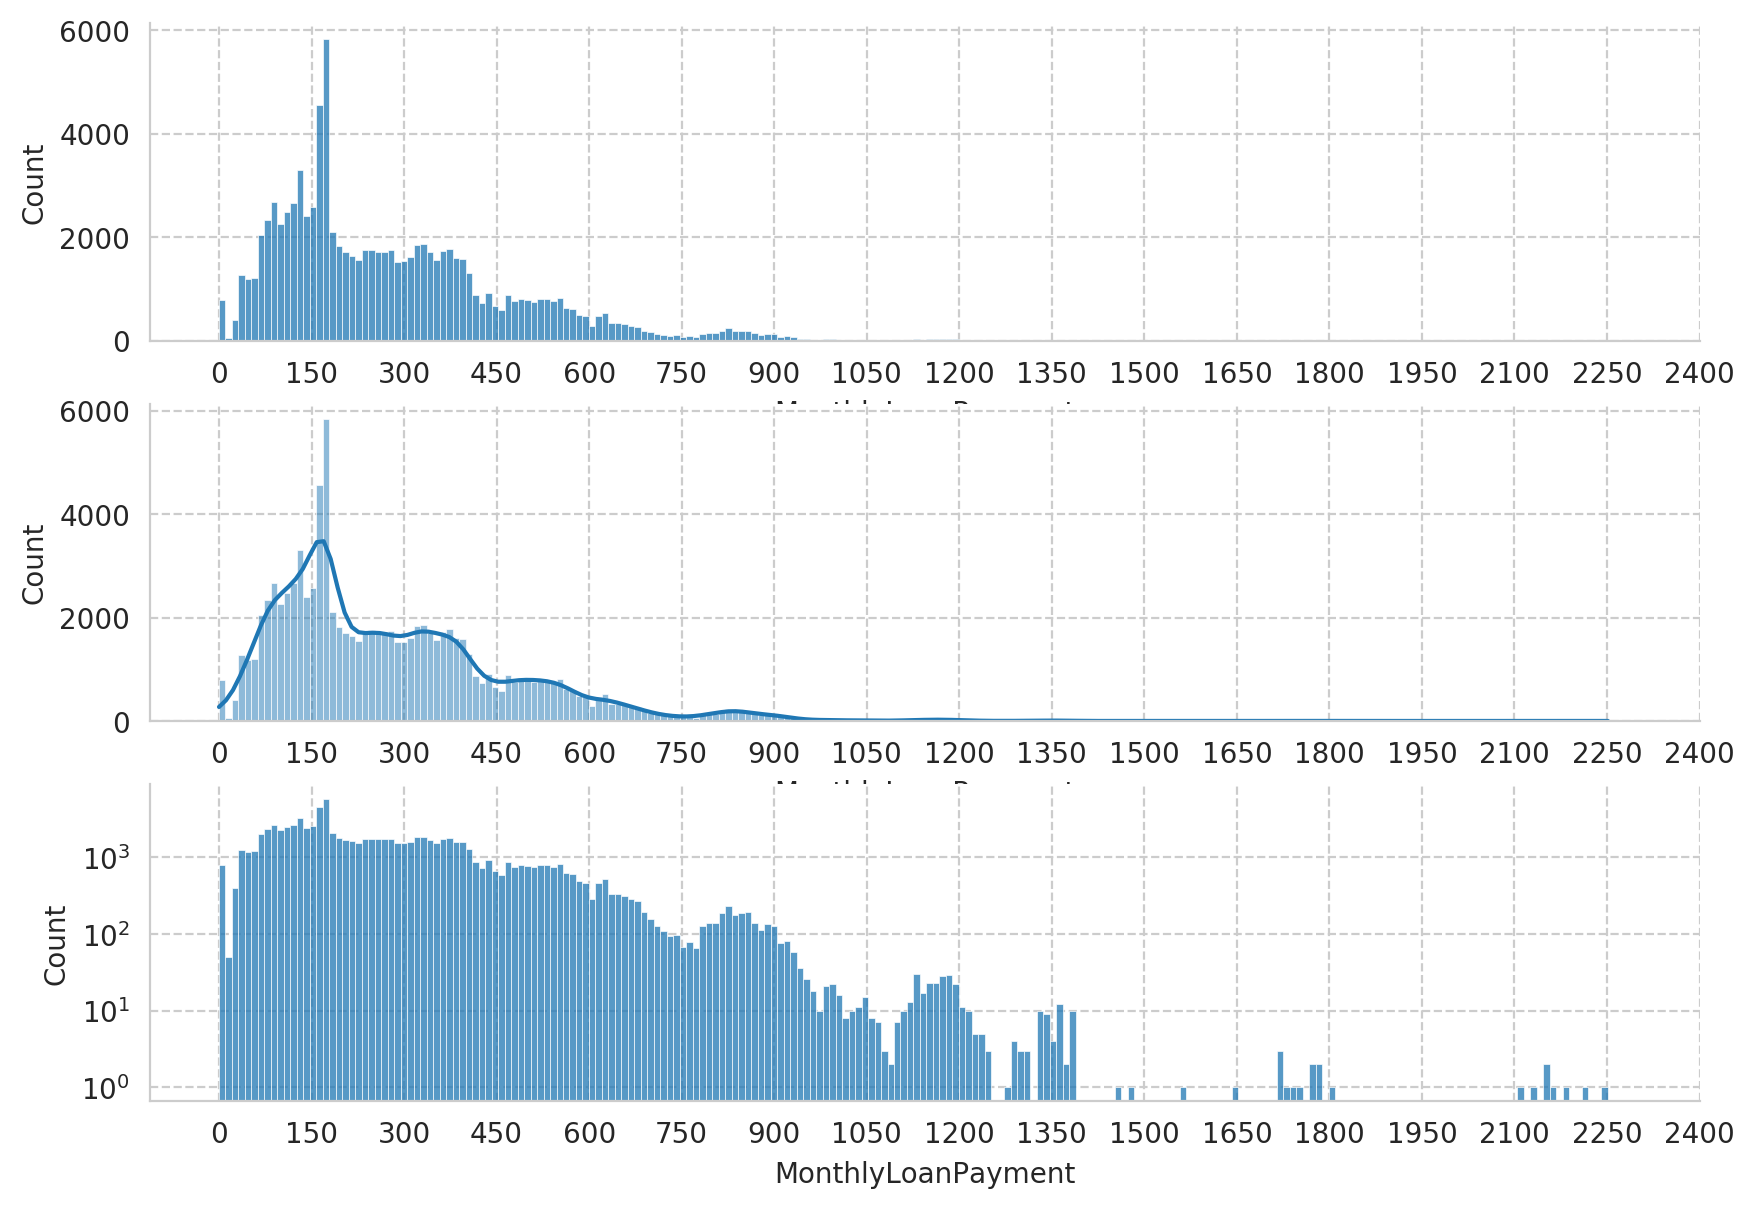

In [69]:
fig, axes = plt.subplots(3,1, figsize=(10,7))
sb.despine(fig)

# graph 1 - distribution of borrow rates
xticks_range = np.arange(0, loans_df.MonthlyLoanPayment.max()+150, 150)
g0 = sb.histplot(loans_df,
        x='MonthlyLoanPayment',
        #binrange=(0, 0.4),
        element='bars',
        multiple="stack",
        ax=axes[0]);
g0.set_xticks(xticks_range);

g1 = sb.histplot(loans_df,
        x='MonthlyLoanPayment',
        #binrange=(0, 0.4),
        element='bars',
        kde=True,
        multiple="stack",
        ax=axes[1]);
g1.set_xticks(xticks_range);

axes[2].set(yscale="log")
g2 = sb.histplot(loans_df,
        x='MonthlyLoanPayment',
        #binrange=(0, 0.4),
        element='bars',
        multiple="stack",
        ax=axes[2]);
g2.set_xticks(xticks_range);

plt.show();

From the above histogram plots we are able to see a heavily right tailed distribution, where the logarithmic scaling reveals the outliers ~\$1500 per month and above, the bulk of the customer repayments ranging around \$150 per month.

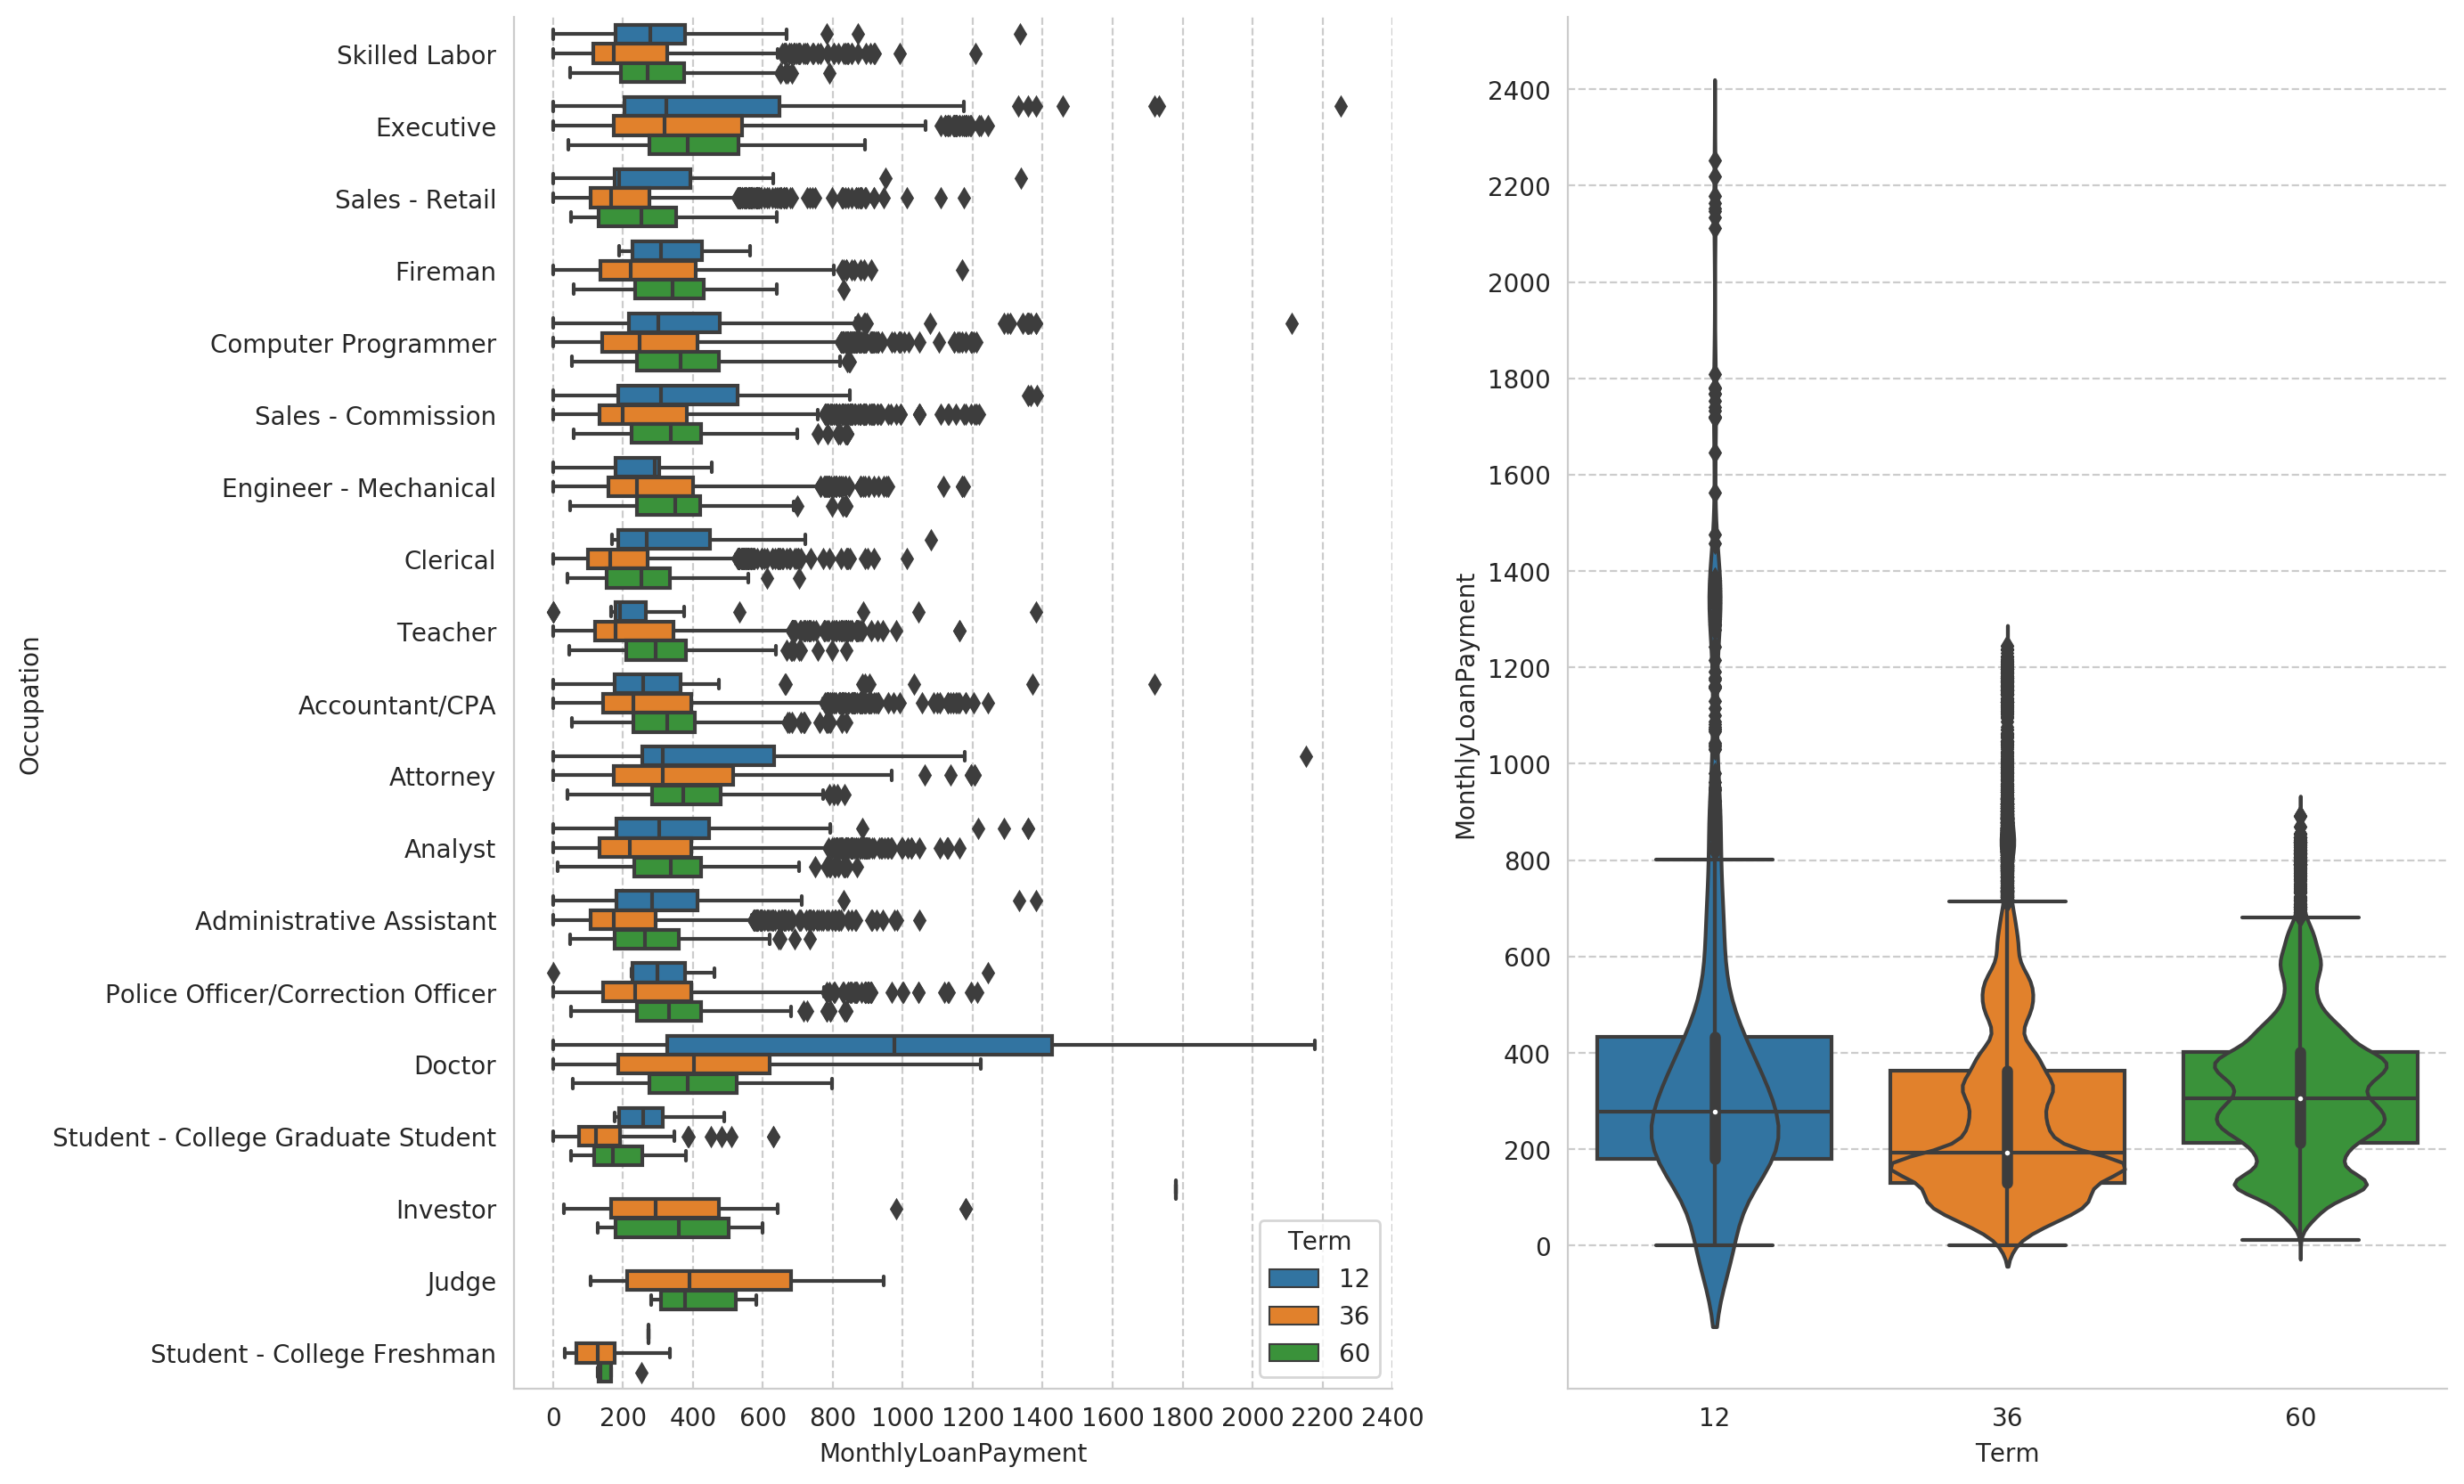

In [60]:
# set figure to have major grid lines
sb.set_style("whitegrid", {'grid.linestyle': '--'})
fig, axes = plt.subplots(1, 2, figsize=(14,10) )
sb.despine(fig)

# set custom labels to
xyticks_range = np.arange(0, loans_df.MonthlyLoanPayment.max()+200, 200)

g0 = sb.boxplot(
        x = loans_df['MonthlyLoanPayment'],
        y = loans_df[sample_occp_mask].Occupation, # sample list of occupations
        hue = loans_df['Term'],
        ax = axes[0])
g0.set_xticks(xyticks_range);

g1 = sb.violinplot(
        y = loans_df['MonthlyLoanPayment'],
        x = loans_df.Term,
        ax = axes[1])
g1 = sb.boxplot(
    y = loans_df['MonthlyLoanPayment'],
        x = loans_df.Term,
        ax = axes[1])
g1.set_yticks(xyticks_range);

The table summary, violin & box plot above reveals the majority of Prosper clients requiring loans prefer 36 month/3 year terms. 
The plot reveals a significant quantity of outliers within 12 month terms, afterwards the outliers gradually decrease as the terms increase. The median monthly repayments range between as low as \$100 to as high as \$400 across all **Occupations**.

Delving deeper into the spread within each of the sample occupations mentioned earlier, we can see that doctors have a large IQR (interquartile range) indicating a large population of doctors have loan repayments of substantial variance when taking out a 12 month/1 year loan, potentially indicating the professions potential buying power, spending habits/capital investments required as part of there profession, i.e. dental equipment amongst other various factors speculating if these doctors start their own practice and need the large capital investment.


The graph below is the previously plotted graph as seen on the pair plot at the start of __section 2. EDA__, however this graph includes the term variable to reveal the distribution of repayments amounts based on the terms chosen.
The plot below further supports the statement above where the people prefer the 36 month/3 year term, it reveals the spread of individuals with there respective loan repayments vs the borrower rate they have been given by Prosper. The 36 month/3 year term is significantly dominant soon followed by the 60 month/5 year then 12 month/1 year.

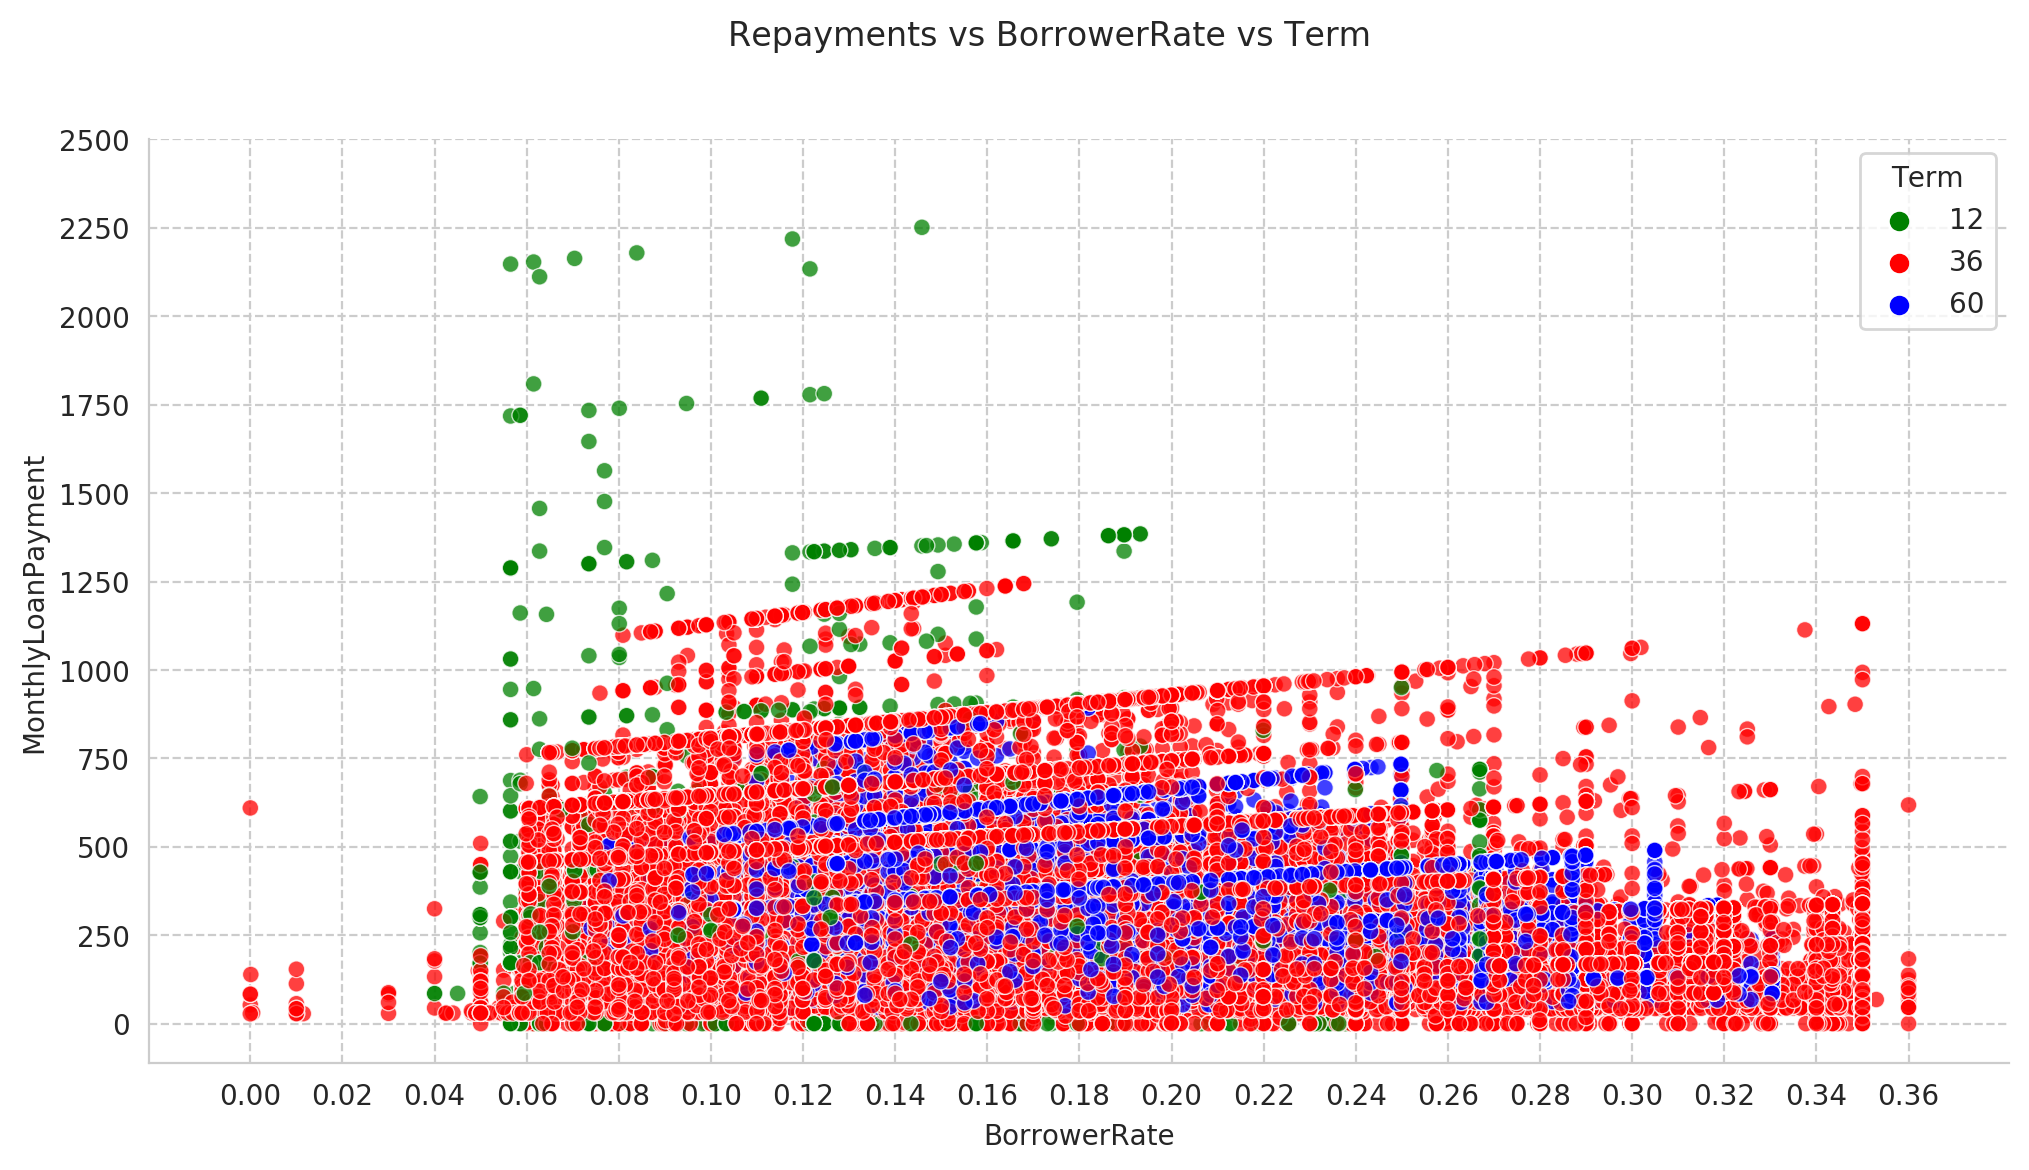

In [70]:
# define figure and num. axes
fig, axes = plt.subplots(1, 1, figsize=(12, 6) )
sb.despine(fig)

#define axis ticks
yticks_range = np.arange(0, loans_df.MonthlyLoanPayment.max()+250, 250)
xticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.02, 0.02)

g0 = sb.scatterplot(y = loans_df['MonthlyLoanPayment'], 
                    x = loans_df.BorrowerRate, 
                    hue = loans_df.Term, 
                    ax = axes, 
                    palette=['green','red','blue'], alpha=0.75)
g0.set_xticks(xticks_range)
g0.set_yticks(yticks_range)

fig.suptitle('Repayments vs BorrowerRate vs Term');

plt.show();

#### 2.1.6 ProsperRating / CreditGrade

# TODO COMBINE PROSPER RATING AND CREDIT RATING COLUMNS

In [7]:
loans_df['CreditGrade'].value_counts(dropna=False)

NaN    76344
C       4012
D       3394
B       3092
AA      2392
A       2348
HR      1589
E       1583
Name: CreditGrade, dtype: int64

In [8]:
loans_df['ProsperRating (Alpha)'].value_counts(dropna=False)

NaN    18530
C      16501
B      14379
A      13491
D      12631
E       8443
HR      5682
AA      5097
Name: ProsperRating (Alpha), dtype: int64

The next category to review are **CreditGrade** and **ProsperRating** because they cannot be analysed separately as each rating type is based on a specific time period, where the former was used for users pre 2009 and the latter was for post 2009.
Quickly reviewing the two columns reveals there are **Nan** evident on either field whilst the other contains an entry.
As such the dataframe will be split accordingly.

In [75]:
# dataframe[list of columns required] [filter requirement]
creditRating_df = loans_df[['ListingCreationDate', 'CreditGrade', 'ProsperRating (Alpha)']][loans_df['ProsperRating (Alpha)'].isna()]

creditRating_df.sample(10)

ListingCreationDate CreditGrade ProsperRating (Alpha)
40860  2007-12-27 13:34:27.743           C                   NaN
410    2007-10-18 08:07:36.977           D                   NaN
84878  2007-04-16 07:20:25.093          HR                   NaN
3712   2007-08-14 07:02:36.040           C                   NaN
66489  2007-04-06 11:49:31.433          AA                   NaN
27753  2008-05-02 11:34:07.853          AA                   NaN
4424   2007-12-06 13:38:29.400           B                   NaN
47962  2008-06-08 14:02:19.967           D                   NaN
3558   2008-06-09 16:31:44.407           B                   NaN
105255 2008-05-26 06:03:43.610           D                   NaN

##### Credit Rating Mask

In [84]:
# dataframe[list of columns required] [filter requirement]
# ProsperRating post 2009 and CreditRating pre 2009
grade_mask = loans_df['ListingCreationYear']<2009
rating_mask = loans_df['ListingCreationYear']<2009

# New df's for simpler recall/viewing
ratings_loans_df[['ListingCreationYear', 'ListingCreationMonth', 'CreditGrade', 'ProsperRating (Alpha)']][grade_mask] 
ratings_loans_df[['ListingCreationYear', 'ListingCreationMonth', 'CreditGrade', 'ProsperRating (Alpha)']][rating_mask] 

ListingCreationYear  ListingCreationMonth
count         18503.000000          18503.000000
mean           2007.558450              6.074258
std               0.496585              2.963530
min            2007.000000              1.000000
25%            2007.000000              4.000000
50%            2008.000000              6.000000
75%            2008.000000              8.000000
max            2008.000000             12.000000

In [12]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94754 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EmploymentStatus       94754 non-null  object        
 1   BorrowerState          94754 non-null  object        
 2   Occupation             94754 non-null  object        
 3   CreditGrade            18410 non-null  category      
 4   ProsperScore           76224 non-null  float64       
 5   ProsperRating (Alpha)  76224 non-null  object        
 6   IncomeRange            94754 non-null  category      
 7   Term                   94754 non-null  int64         
 8   CurrentDelinquencies   94754 non-null  float64       
 9   BorrowerRate           94754 non-null  float64       
 10  DebtToIncomeRatio      94754 non-null  float64       
 11  ListingCreationDate    94754 non-null  datetime64[ns]
 12  ClosedDate             41550 non-null  datetime64[ns]
 13  

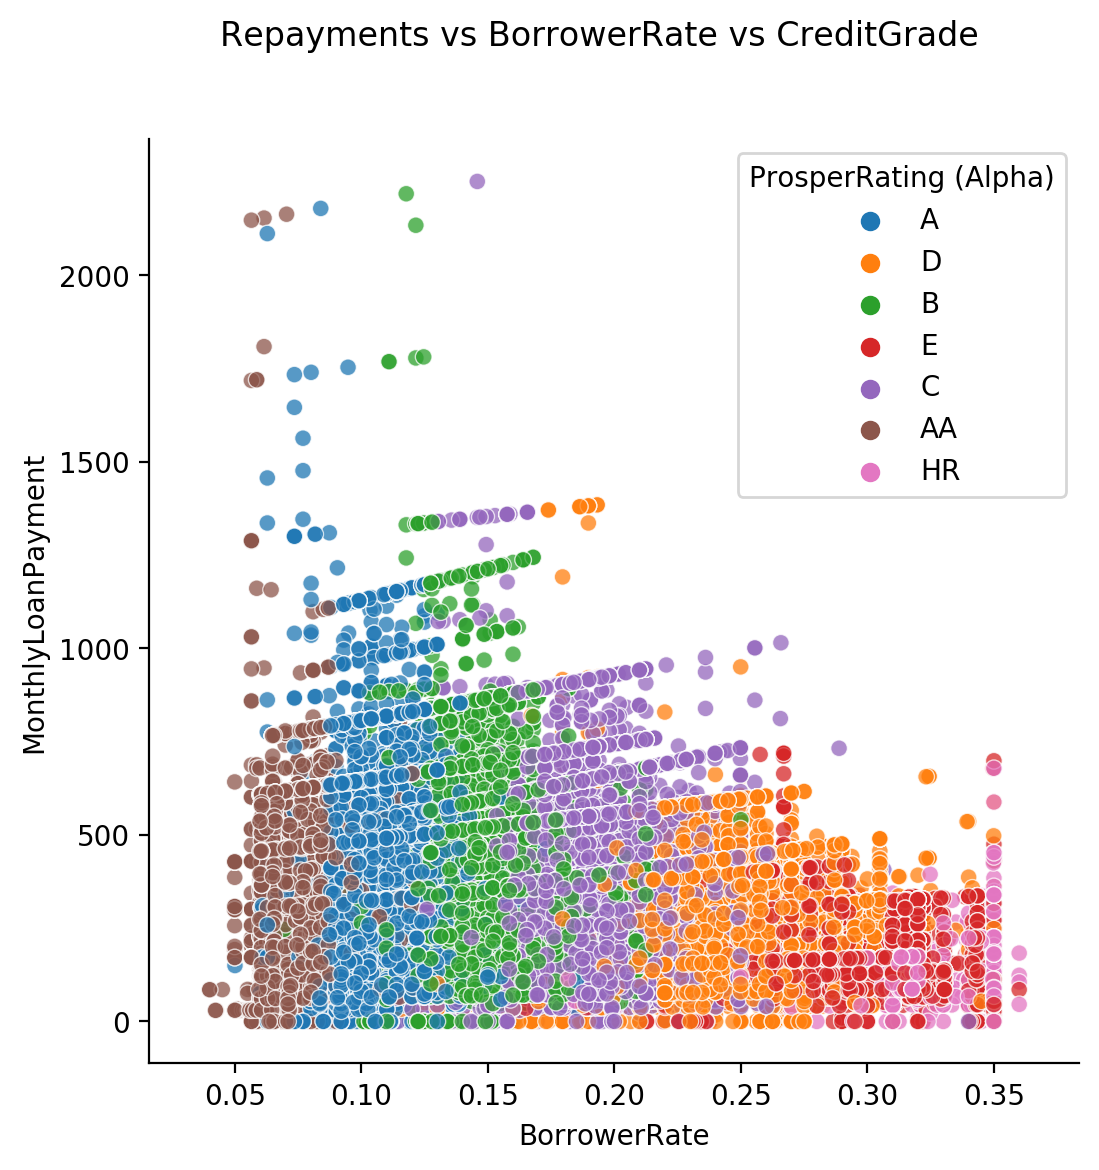

In [16]:
# define figure and num. axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6) )
sb.despine(fig)

#define axis ticks
#yticks_range = np.arange(0, loans_df.MonthlyLoanPayment.max()+250, 250)
#xticks_range = np.arange(0, loans_df.BorrowerRate.max()+0.02, 0.02)

g0 = sb.scatterplot(y = loans_df['MonthlyLoanPayment'], 
                    x = loans_df.BorrowerRate, 
                    hue = loans_df['ProsperRating (Alpha)'], 
                    ax = axes, 
                    hue_order = ,
                    #palette=['green','red','blue'], 
                    alpha=0.75)
#g0.set_xticks(xticks_range)
#g0.set_yticks(yticks_range)

fig.suptitle('Repayments vs BorrowerRate vs CreditGrade');

plt.show();

# TODO - organise Category level
Definitions:
HR = High Risk

In [1]:
loans_raw[['ProsperRating (numeric)', 'ProsperRating (Alpha)']]

ProsperRating (numeric) ProsperRating (Alpha)
0                           NaN                   NaN
1                           6.0                     A
2                           NaN                   NaN
3                           6.0                     A
4                           3.0                     D
...                         ...                   ...
113932                      4.0                     C
113933                      6.0                     A
113934                      3.0                     D
113935                      4.0                     C
113936                      6.0                     A

[113937 rows x 2 columns]

From the data dictionary provided we can see that the ProsperRating and CreditGrade 

In [ ]:
## TODO
graph pre 2009 (CreditRating) and
graph post 2009 (ProsperRating)

compare if trend of borrow rates are the same across the two time periods
then 
compare against borrowerrate
then
delve deeper into whether each occupation varies

In [ ]:
sb.despine(fig)

Occ_order=['Computer Programmer', 'Analyst',
           'Executive', 'Investor', 'Sales - Commission',
           'Accountant/CPA', 'Clerical', 'Administrative Assistant',
           'Teacher', 'Student - College Freshman', 'Student - College Graduate Student',
           'Judge', 'Attorney', 'Doctor', 'Engineer - Mechanical',
           'Fireman', 'Police Officer/Correction Officer', 'Skilled Labor']

g0 = sb.FacetGrid(data=loans_df[sample_occp_mask], col='Occupation', 
                  col_wrap=3, # number of columns before starting a new row
                  col_order = Occ_order,
                  #height=2,
                  aspect=2,
                  sharex=False,
                  xlim=(0,0.4),
                  margin_titles=True);
g0.map_dataframe(sb.boxplot, 'BorrowerRate', 'EmploymentStatus');

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5))
sb.despine(fig)

# load df w/ mask
g0 = sb.histplot(loans_df.MonthlyLoanPayment)

In [ ]:
loans_df.MonthlyLoanPayment.value_counts()

#### 2.1.X BorrowerState

In [ ]:
# top X states
states=5 # user to change

StateTopN = loans_df.BorrowerState.value_counts().head(states)
StateTopN

In [ ]:
state_N_mask = loans_df['BorrowerState'].isin(StateTopN.index)

In [ ]:
loans_df[state_N_mask].sample(5)

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(12,10))
sb.despine(fig)

g0 = sb.histplot(loans_df[state_N_mask],
        x='BorrowerState', 
        ax=axes[0]);
xplot_values(g0, '{:1.0f}')

# load df w/ mask
g1 = sb.histplot(loans_df[state_N_mask], 
        x='BorrowerRate',
        binrange=(0, 0.5),
        element='bars',
        stat='count',
        hue='BorrowerState',
        multiple="stack",
        ax=axes[1])

axes[2].set(yscale="log")
## CHANGE Y TICK NUMBERS
g2 = sb.histplot(loans_df[state_N_mask],
        x='BorrowerRate',
        binrange=(0, 0.5),
        element='bars',
        stat='count',
        hue='BorrowerState',
        multiple="stack",
        ax=axes[2])

In [ ]:
hm_loans_df = loans_df[['BorrowerRate', 'BorrowerState']][state_N_mask]
hm_loans_df

#### Debt to Income Ratio

In [ ]:
loans_df.DebtToIncomeRatio.value_counts()

#### 2.1.X Credit Grade

In [ ]:
loans_df.CreditGrade.value_counts()

In [ ]:
loans_df.columns

In [ ]:
loans_df.CreditGrade.value_counts(dropna=False)

In [ ]:
loans_df.CreditGrade = loans_df.CreditGrade.fillna('N/A')

### ClosedDate

In [ ]:
loans_df.ClosedDate.value_counts(dropna=False)
# There are a significant amount of NaT, i.e. 58848